<a href="https://colab.research.google.com/github/siim2mary/CODSOFT/blob/main/Bankcustomerchurnprediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project-3

---



# **Customer Churn Prediction**

---



The document titled "Customer Churn Prediction is  related to a project focused on predicting customer churn for a bank. Based on the content provided, here is a brief introduction, objectives, and a summary of the models used:

Introduction:
This document is part of a project aimed at addressing the issue of customer churn in a bank. Customer churn, or customer attrition, refers to the phenomenon where customers cease doing business with a company or institution, such as a bank. It's a significant concern for businesses, including banks, as retaining existing customers is often more cost-effective than acquiring new ones.

Objectives:
The objectives of the project seem to revolve around predicting customer churn within the bank's customer base. The specific objectives might include:

Identifying factors that contribute to customer churn, such as customer demographics, financial indicators, or interactions with the bank's products and services.

Developing a predictive model that can estimate the likelihood of a customer churning.

Leveraging data analysis and machine learning techniques to improve the bank's ability to proactively identify and retain at-risk customers.

Assessing the accuracy and effectiveness of different machine learning models in predicting customer churn.
Models Used:
The document explores several machine learning models for predicting customer churn within the bank's customer base. Some of the key models mentioned in the document include:

Gradient Boosting Classifier: A high-performing model with an accuracy of 0.8669. The Gradient Boosting Classifier, based on the GradientBoostingClassifier algorithm, is used for predicting customer churn. This model is a part of the project's primary focus.

Logistic Regression: Logistic regression is a fundamental and interpretable model employed in the document. It provides a test accuracy of 78.50%, making it a relevant choice for predicting churn probabilities.

Random Forest Classifier: The document includes a Random Forest Classifier, a popular ensemble learning algorithm, which is valuable for feature importance analysis and predictive modeling.

Quadratic Discriminant Analysis (QDA): QDA is another model mentioned. It's a classification technique used to estimate the probability that a data point belongs to a particular class.

These models collectively contribute to the bank's efforts to identify and predict customer churn. They enable data analysis and machine learning techniques to improve the accuracy of churn prediction, allowing the bank to take proactive measures to retain at-risk customers and enhance its overall customer relationship management.

Summary of Results:
The document presents a comprehensive analysis of various machine learning models applied to predict customer churn in the banking sector. The following key results and insights have been derived:

Model Performance: The document evaluates several machine learning models, with the Gradient Boosting Classifier emerging as the top-performing model. It achieved an accuracy of 0.8669, an AUC of 0.8903, and demonstrated decent recall, precision, F1 score, Kappa, and Matthews Correlation Coefficient (MCC).

Logistic Regression: While not the best-performing model, logistic regression still achieved a respectable test accuracy of 78.50%. This model provides an interpretable baseline for churn prediction.

Predicted Probabilities: The document provides predicted churn probabilities for individual customers, enabling the bank to identify customers at risk of churning. These probabilities offer valuable insights for personalized customer retention strategies.

Random Forest Classifier: Although not highlighted as the top model, the Random Forest Classifier remains an essential tool for its ability to assess feature importance and contribute to the overall understanding of the factors influencing customer churn.

Feature Importance: Through the use of various models, the document offers insights into the importance of different customer attributes (features) that affect churn prediction. These insights can guide strategic decision-making for the bank.

In conclusion, the document's analysis and modeling efforts provide the bank with a range of tools and insights to predict and manage customer churn effectively. The Gradient Boosting Classifier stands out as the most accurate model, while logistic regression offers interpretability and a reasonable level of accuracy. The combination of models and churn probabilities equips the bank with the means to proactively address churn and improve customer relationship management.





Import necessary Libraries

---



In [2]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as po


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
path_to_file1= '/content/drive/MyDrive/Churn_Modelling.csv'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import shutil

# Copy the file to the current working directory in Colab
shutil.copy(path_to_file1, './Churn_Modelling.csv')


'./Churn_Modelling.csv'

Import Dataset

---



In [8]:
customer_churn = pd.read_csv("/content/Churn_Modelling.csv")

In [9]:
customer_churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [10]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
customer_churn.drop(['RowNumber'], inplace = True ,axis=1)

In [12]:
customer_churn

CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00              1          1               1        101348.88   
1      83807.86              1          0               1        112542.58   
2     159660.80              3          1               0        113931.57   
3          0.00              2          0               0         93826.63   
4     125510.82              1          1               1         79084.10   
...         ...            ...        ...             ...              ...   
9995       0.00              2          1               0         96270.64   
9996   57369.61              1          1               1        101699.77   
9997       0.00              1          0               1         42085.58   
9998   75075.31              2          1               0         92888.52   
9999  130142.79              1          1               0         38190.78   

      Exited  
0          1  
1          0  
2          1  
3          0  
4          0  
...      ...  
9995       0  
9996       0  
9997       1  
9998       1  
9999       0  

[10000 rows x 13 columns]

In [13]:
customer_churn.rename(columns = {'Exited': 'churn'}, inplace = True)
customer_churn.rename(columns = {'NumOfProducts': 'products'}, inplace = True)
customer_churn.rename(columns = {'HasCrCard': 'creditcard'}, inplace = True)
customer_churn.rename(columns = {'IsActiveMember': 'member'}, inplace = True)
customer_churn.rename(columns = {'EstimatedSalary': 'salary'}, inplace = True)

In [14]:
customer_churn.head(5)

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  products  creditcard  member     salary  churn  
0       0.00         1           1       1  101348.88      1  
1   83807.86         1           0       1  112542.58      0  
2  159660.80         3           1       0  113931.57      1  
3       0.00         2           0       0   93826.63      0  
4  125510.82         1           1       1   79084.10      0

In [15]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerId   10000 non-null  int64  
 1   Surname      10000 non-null  object 
 2   CreditScore  10000 non-null  int64  
 3   Geography    10000 non-null  object 
 4   Gender       10000 non-null  object 
 5   Age          10000 non-null  int64  
 6   Tenure       10000 non-null  int64  
 7   Balance      10000 non-null  float64
 8   products     10000 non-null  int64  
 9   creditcard   10000 non-null  int64  
 10  member       10000 non-null  int64  
 11  salary       10000 non-null  float64
 12  churn        10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [16]:
customer_churn.dtypes

CustomerId       int64
Surname         object
CreditScore      int64
Geography       object
Gender          object
Age              int64
Tenure           int64
Balance        float64
products         int64
creditcard       int64
member           int64
salary         float64
churn            int64
dtype: object

In [17]:
customer_churn['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [18]:
customer_churn.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'products', 'creditcard', 'member', 'salary',
       'churn'],
      dtype='object')

In [19]:
customer_churn['Surname'].value_counts()

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64

In [20]:
customer_churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [21]:
customer_churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [22]:
customer_churn.dtypes

CustomerId       int64
Surname         object
CreditScore      int64
Geography       object
Gender          object
Age              int64
Tenure           int64
Balance        float64
products         int64
creditcard       int64
member           int64
salary         float64
churn            int64
dtype: object

In [23]:
customer_churn['salary'].value_counts()

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: salary, Length: 9999, dtype: int64

In [24]:
customer_churn['Balance'].value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance, Length: 6382, dtype: int64

In [25]:
customer_churn['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [26]:
customer_churn['Tenure'].nunique()

11

In [27]:
customer_churn['member'].value_counts()

1    5151
0    4849
Name: member, dtype: int64

In [28]:
customer_churn['member'].nunique()

2

In [29]:
customer_churn.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  products  creditcard  member     salary  churn  
0       0.00         1           1       1  101348.88      1  
1   83807.86         1           0       1  112542.58      0  
2  159660.80         3           1       0  113931.57      1  
3       0.00         2           0       0   93826.63      0  
4  125510.82         1           1       1   79084.10      0

In [30]:
customer_churn.describe().T

count          mean           std          min          25%  \
CustomerId   10000.0  1.569094e+07  71936.186123  15565701.00  15628528.25   
CreditScore  10000.0  6.505288e+02     96.653299       350.00       584.00   
Age          10000.0  3.892180e+01     10.487806        18.00        32.00   
Tenure       10000.0  5.012800e+00      2.892174         0.00         3.00   
Balance      10000.0  7.648589e+04  62397.405202         0.00         0.00   
products     10000.0  1.530200e+00      0.581654         1.00         1.00   
creditcard   10000.0  7.055000e-01      0.455840         0.00         0.00   
member       10000.0  5.151000e-01      0.499797         0.00         0.00   
salary       10000.0  1.000902e+05  57510.492818        11.58     51002.11   
churn        10000.0  2.037000e-01      0.402769         0.00         0.00   

                      50%           75%          max  
CustomerId   1.569074e+07  1.575323e+07  15815690.00  
CreditScore  6.520000e+02  7.180000e+02       850.00  
Age          3.700000e+01  4.400000e+01        92.00  
Tenure       5.000000e+00  7.000000e+00        10.00  
Balance      9.719854e+04  1.276442e+05    250898.09  
products     1.000000e+00  2.000000e+00         4.00  
creditcard   1.000000e+00  1.000000e+00         1.00  
member       1.000000e+00  1.000000e+00         1.00  
salary       1.001939e+05  1.493882e+05    199992.48  
churn        0.000000e+00  0.000000e+00         1.00

In [ ]:
# Customize the appearance using a color palette
styled_summary = customer_churn.describe().style.background_gradient(cmap="Set2")

# Display the styled summary
styled_summary

In [32]:
# Summarize categorical features
customer_churn.describe(include=["object"])

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

In [31]:
customer_churn.isnull().sum()

CustomerId     0
Surname        0
CreditScore    0
Geography      0
Gender         0
Age            0
Tenure         0
Balance        0
products       0
creditcard     0
member         0
salary         0
churn          0
dtype: int64

In [33]:
customer_churn.isna().sum()

CustomerId     0
Surname        0
CreditScore    0
Geography      0
Gender         0
Age            0
Tenure         0
Balance        0
products       0
creditcard     0
member         0
salary         0
churn          0
dtype: int64

In [34]:
customer_churn.isna().any()

CustomerId     False
Surname        False
CreditScore    False
Geography      False
Gender         False
Age            False
Tenure         False
Balance        False
products       False
creditcard     False
member         False
salary         False
churn          False
dtype: bool

There are no null values or NaN values

In [35]:
for i in customer_churn.columns:
    print("***********************************************",i,
         "*************************************************")
    print()
    print(set(customer_churn[i].tolist()))
    print()

*********************************************** CustomerId *************************************************

{15695872, 15794178, 15794187, 15630349, 15597591, 15630363, 15794204, 15728669, 15663134, 15597602, 15597610, 15728683, 15761453, 15728693, 15663161, 15663164, 15695932, 15794236, 15663168, 15630402, 15728706, 15761477, 15728709, 15794253, 15630413, 15761487, 15794257, 15630419, 15761497, 15794266, 15663194, 15794273, 15761506, 15794276, 15794278, 15761525, 15794297, 15663234, 15630466, 15728773, 15597709, 15663249, 15761554, 15794323, 15663252, 15663263, 15794345, 15597739, 15630511, 15696047, 15794356, 15696054, 15728823, 15794360, 15696061, 15663294, 15728829, 15761600, 15728838, 15761606, 15663312, 15630551, 15794396, 15696098, 15794413, 15794414, 15630580, 15728885, 15761654, 15696120, 15630592, 15761670, 15728906, 15696141, 15728912, 15728917, 15630617, 15663386, 15761692, 15794468, 15794472, 15761706, 15794479, 15696175, 15761713, 15663410, 15630641, 15761717, 15761720,

In [36]:
# Check for NaN values
nan_check = customer_churn.isna()


# Count the number of NaN values in each column
nan_count = nan_check.sum()
print("nan count:", nan_count)

# Count the total number of NaN values in the DataFrame
total_nan_count = nan_check.values.sum()
print("Total no of nana count in dataframe:", total_nan_count)

# Check if there are any NaN values in the DataFrame
any_nan = nan_check.any().any()

# Check if there are no NaN values in the DataFrame
no_nan = nan_check.all().all()
print("TO check if there are no nan values:",no_nan)

nan count: CustomerId     0
Surname        0
CreditScore    0
Geography      0
Gender         0
Age            0
Tenure         0
Balance        0
products       0
creditcard     0
member         0
salary         0
churn          0
dtype: int64
Total no of nana count in dataframe: 0
TO check if there are no nan values: False


Handle missing values

---



In [37]:
customer_churn.isnull().any()

CustomerId     False
Surname        False
CreditScore    False
Geography      False
Gender         False
Age            False
Tenure         False
Balance        False
products       False
creditcard     False
member         False
salary         False
churn          False
dtype: bool

<Axes: >

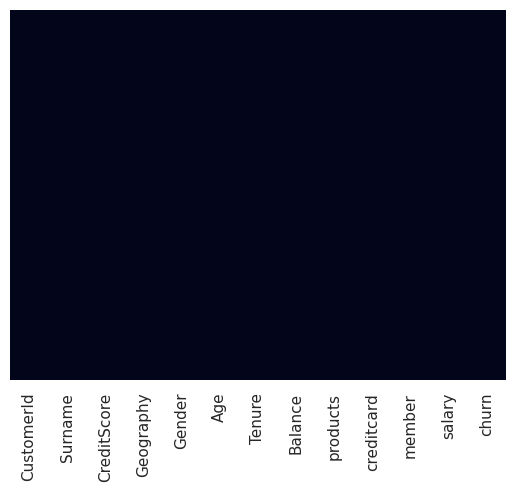

In [ ]:
sns.heatmap(customer_churn.isnull(), yticklabels = False, cbar = False)

now there are no null values

In [ ]:
customer_churn['churn'].value_counts().unique()

array([7963, 2037])

In [ ]:
churn_x = customer_churn['churn'].value_counts().keys().tolist()
churn_y = customer_churn['churn'].value_counts().values.tolist()

fig = px.pie(customer_churn, labels= churn_x, values=churn_y,
            color_discrete_sequence=['grey','red'], hole=0.6)

fig.update_layout(title ="Customer Churn", template ="plotly_dark")
fig.show()

refercreditcardfradulent,manufacturingdataset 16 oct22,telecomproject,mechanicaldomain,bankingdomain18th dec,health

Bar Chart for Churn Distribution:

---



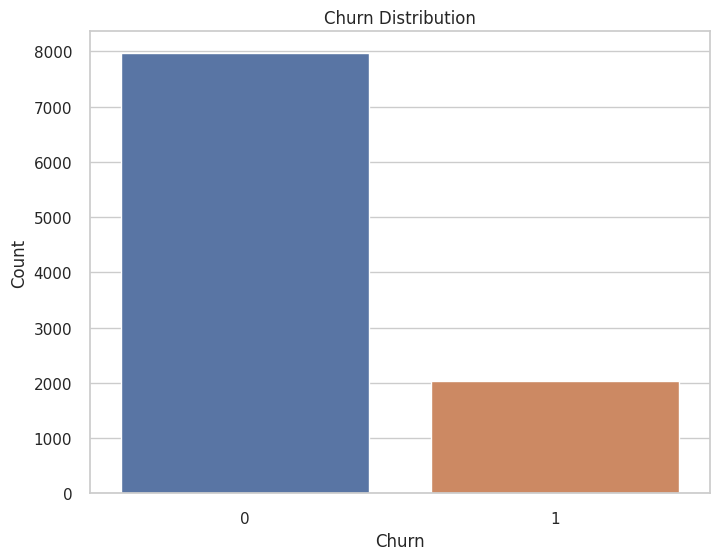

There are 7963 customers without churn and 2037 with churn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=customer_churn, x="churn")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


churns=customer_churn['churn'].value_counts()
print(f"There are {churns[0]} customers without churn and {churns[1]} with churn")


From the graph itself its clear that there is imbalances in classes.So during Data Processing we use SMOTE technique to overcome this imbalance.

Pie Chart for Churn Percentage:

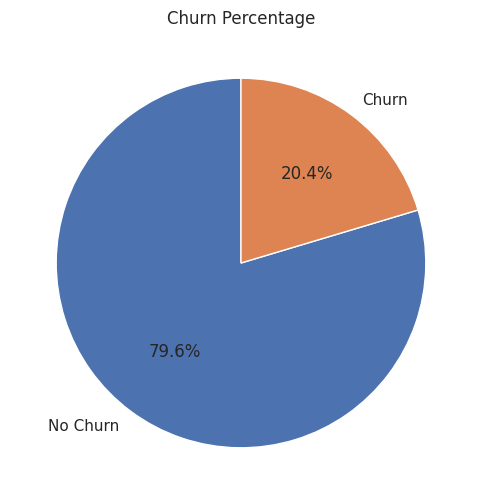

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(customer_churn["churn"].value_counts(), labels=["No Churn", "Churn"], autopct="%1.1f%%", startangle=90)
plt.title("Churn Percentage")
plt.show()


Correlation Heatmap:

---

A heatmap to visualize the correlations between different features and the target

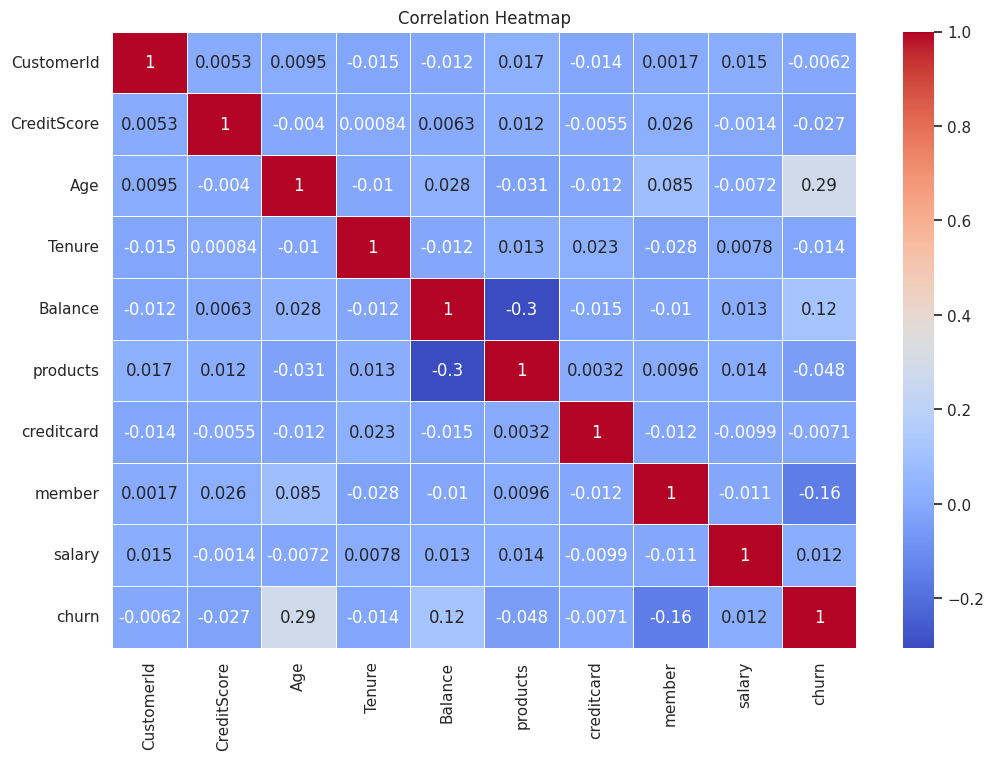

In [ ]:
corr_matrix = customer_churn.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


 In this case, the "coolwarm" color map is used, where dark colors (e.g., dark red) represent positive correlations, and cool colors (e.g., dark blue) represent negative correlations.Each cell in the heatmap corresponds to the correlation between two variables. The intersection of a row and a column represents the correlation between the variables identified by the row and column labels.The diagonal line of the heatmap is filled with a single color (usually a shade of one color). This diagonal represents the correlation of each variable with itself, which is always perfectly correlated (correlation coefficient of 1.0).

Positive values close to 1 indicate strong positive correlations between variables.
Negative values close to -1 indicate strong negative correlations between variables.
Values close to 0 indicate little to no linear correlation between variables.

Balance and products are negatively corelated.churn has negative corelation with member.

Box Plot for Numerical Features:

---



Use box plots to visualize the distribution of numerical features by churn status:

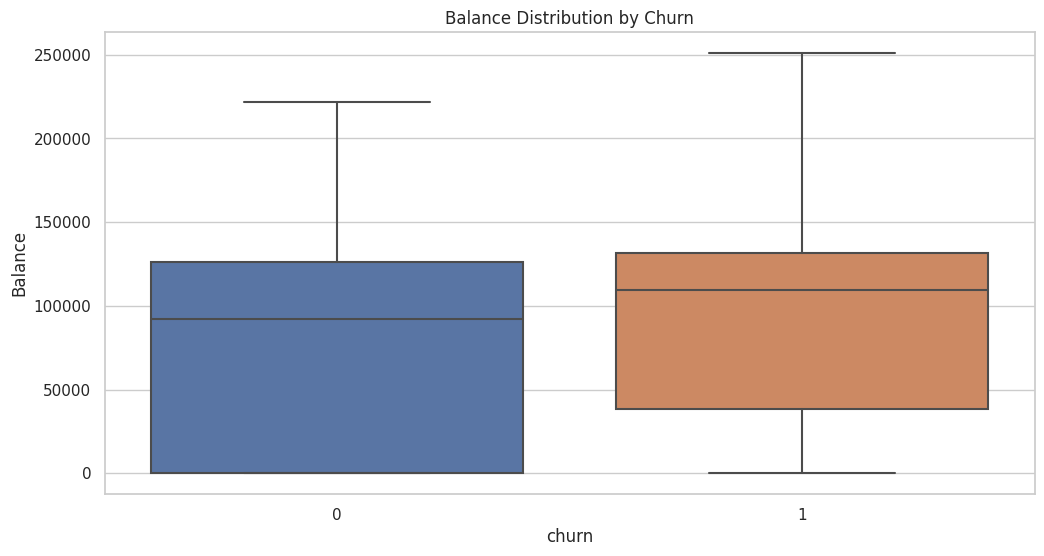

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="Balance")
plt.title("Balance Distribution by Churn")
plt.show()


Indicates customer with higher balance are likely to churn more.

Median (Line inside the Box): The line inside each box represents the median (50th percentile) of the "Balance" for each group (churned and not churned).

Box (Interquartile Range): The box represents the interquartile range (IQR) of the "Balance" distribution. It covers the range from the 25th percentile (bottom edge) to the 75th percentile (top edge) of the data. This range contains the middle 50% of the data.

Whiskers: The "whiskers" extend from the edges of the box to the minimum and maximum values within a defined range. Any data points outside this range are considered "outliers" and are plotted as individual points.

Outliers (Individual Points): Individual data points that fall outside the whiskers are plotted as individual points and are considered outliers. These are potential anomalies or extreme values in the "Balance."
Difference in Medians (Central Tendency):

If the median "Balance" for churned customers (Churn = 1) is significantly lower or higher than the median "Balance" for non-churned customers (Churn = 0), it suggests that there is a central tendency difference.
For example, if the median "Balance" is significantly lower for churned customers, it could imply that customers with lower balances are more likely to churn. Conversely, a higher median "Balance" for churned customers could indicate that those with higher balances are more likely to churn.
Difference in IQRs (Variability):

If the IQR of "Balance" for churned customers is notably different from the IQR for non-churned customers, it indicates variations in the spread of "Balance" data.
A wider IQR for churned customers may suggest greater variability in "Balance" within that group. This could mean that some churned customers have very low balances, while others have relatively high balances.
The connection with churn can be interpreted as follows:

Differences in central tendencies (medians) can indicate an average behavior difference between the two groups, suggesting that one group tends to have higher or lower "Balance" on average.

Differences in IQRs highlight the variability in "Balance" within each group. For example, if the IQR is wider for churned customers, it indicates that there is a wider range of "Balance" values among those who have churned, which may be relevant for predicting churn.

<Figure size 800x600 with 0 Axes>

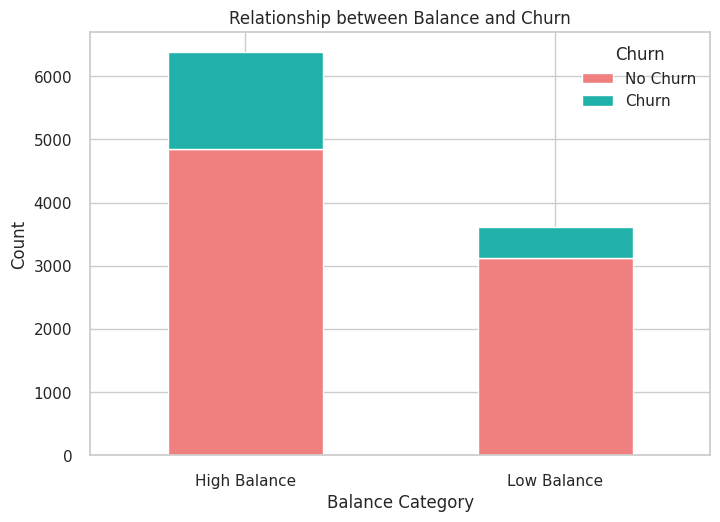

In [ ]:
import matplotlib.pyplot as plt

# Create bar plots to show the relationship between 'Balance' and 'Churn' from the customer_churn DataFrame

plt.figure(figsize=(8, 6))

# Categorize 'Balance' values into two groups: 'Low Balance' and 'High Balance'
# You can adjust the threshold value as needed
threshold = 2500
customer_churn['Balance Category'] = customer_churn['Balance'].apply(lambda x: 'Low Balance' if x < threshold else 'High Balance')

# Plot the relationship between 'Balance' and 'Churn'
balance_churn_counts = customer_churn.groupby(['Balance Category', 'churn']).size().unstack()
balance_churn_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightseagreen'])
plt.title('Relationship between Balance and Churn')
plt.xlabel('Balance Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])


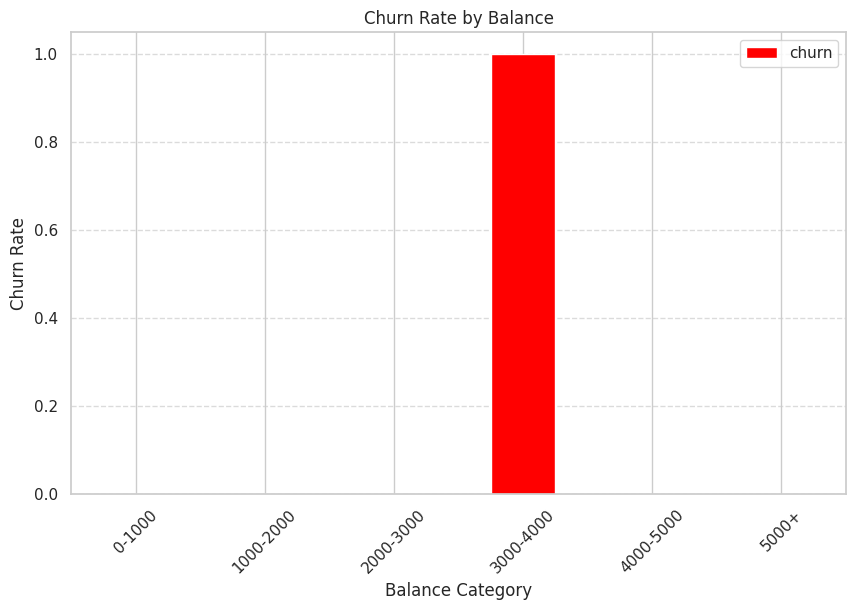

In [ ]:
import matplotlib.pyplot as plt

# Create bar charts to show churn by balance categories
plt.figure(figsize=(10, 6))

# Define bin edges and labels for balance categories
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 10000]
bin_labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000+']

# Categorize 'Balance' into bins
customer_churn['Balance Category'] = pd.cut(customer_churn['Balance'], bins=bin_edges, labels=bin_labels)

# Group the data by 'Balance Category' and calculate the churn rate (mean of Churn column)
churn_by_balance_category = customer_churn.groupby('Balance Category')['churn'].mean()

# Plot the churn rate by balance category
churn_by_balance_category.plot(kind='bar', color='red', width=0.5)
plt.title('Churn Rate by Balance')
plt.xlabel('Balance Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
plt.legend()


plt.show()


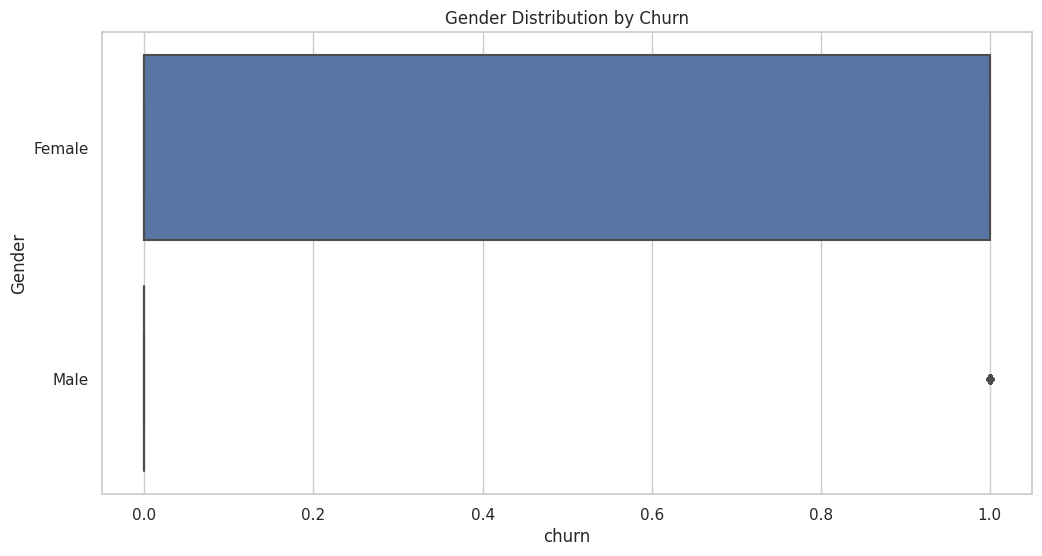

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="Gender")
plt.title("Gender Distribution by Churn")
plt.show()


A wider IQR for churned customers may suggest that gender is more variable among those who have churned compared to those who have not churned.

So, for "male," if you see a single line at 0 and a dot at 1, it means that the median value for "male" is 0, and there is at least one data point or outlier with a value of 1. This suggests that there might be a small number of male customers with a "1" value in the context of the variable you are visualizing (e.g., "Churn" status). The dot represents these individual data points.

A wider box for "female" suggests that there is more variability in the data within the "female" category for the variable you are visualizing. In this case, the variable is likely "Churn" status, and a wider box indicates that the range of values from 0 to 1 is more spread out for "female" customers. This could mean that "female" customers exhibit more diversity in their churn behavior, including both those who have churned (1) and those who have not (0).

In summary, the wider box for "female" indicates greater variability in churn behavior within the "female" category compared to the "male" category. It's a useful visualization for understanding the distribution and spread of "Churn" values among different groups.

It indicates imabalance in data.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table of Gender and Churn
contingency_table = pd.crosstab(customer_churn['churn'], customer_churn['Gender'])

# Perform a chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared test statistic:", chi2)
print("P-value:", p)


Chi-squared test statistic: 112.91857062096116
P-value: 2.2482100097131755e-26


A low p-value (typically < 0.05) indicates a significant association between gender and churn.But here p is of high value so no significant relation.This implies that there is no strong statistical evidence to support a relationship or association between the variables.

---



<Figure size 800x600 with 0 Axes>

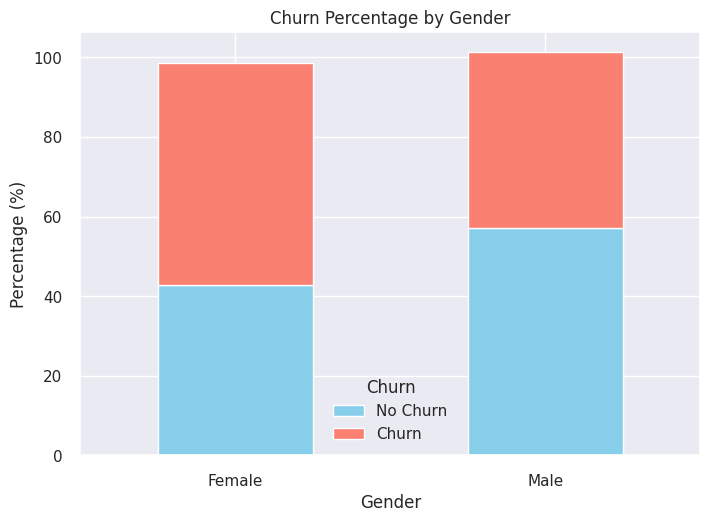

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'Gender' columns.

# Calculate the churn percentage by gender
gender_churn_counts = customer_churn.groupby(['Gender', 'churn']).size().unstack().fillna(0)
gender_churn_percentage = (gender_churn_counts / gender_churn_counts.sum()) * 100

# Create a bar chart to show the churn percentage by gender
plt.figure(figsize=(8, 6))

gender_churn_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Churn Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

plt.show()


From the plot its clear that churn will happen more for Female(about 25%) and for Male its (about 16%)

In [ ]:
gender_churn_counts = customer_churn.groupby(['Gender', 'churn']).agg(['sum'])
gender_churn_counts

RowNumber   CustomerId  \
                   sum          sum   
Gender churn                          
Female 0      16961854  53415388676   
       1       5493875  17869500283   
Male   0      23049792  71533381166   
       1       4499479  14091135569   

                                                        Surname CreditScore  \
                                                            sum         sum   
Gender churn                                                                  
Female 0      HillBoniMitchellKayChinScottHendersonHaoDelluc...     2219927   
       1      HargraveOnioObinnaGerasimovAzikiweLombardoClar...      736800   
Male   0      BartlettHeH?BearceAndrewsGoforthMuldrowMcDonal...     2970780   
       1      ChuRomeoParkhillYooKonovalovaGantT'angFanucciF...      577781   

                                                      Geography     Age  \
                                                            sum     sum   
Gender churn                                                              
Female 0      SpainFranceSpainFranceFranceSpainSpainFranceSp...  127250   
       1      FranceFranceGermanySpainSpainFranceFranceFranc...   51010   
Male   0      FranceFranceFranceFranceSpainGermanySpainFranc...  170633   
       1      SpainGermanyGermanyGermanyGermanySpainGermanyG...   40325   

             Tenure       Balance products creditcard member        salary  
                sum           sum      sum        sum    sum           sum  
Gender churn                                                                
Female 0      16942  2.423078e+08     5294       2397   1870  3.397739e+08  
       1       5619  1.014127e+08     1721        795    414  1.172589e+08  
Male   0      23138  3.369630e+08     7003       3234   2546  4.544429e+08  
       1       4429  8.417536e+07     1284        629    321  8.942669e+07

In [ ]:
import pandas as pd

# Group the DataFrame by 'Gender'
grouped = customer_churn.groupby('Gender')['churn']

# Calculate the count of churned and not churned for each gender
result = grouped.value_counts().unstack()

# Calculate the percentage within each gender group
result['Percentage'] = (result[1] / (result[0] + result[1])) * 100

# Rename the columns for clarity
result.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Print the grouped DataFrame
print(result)


churn   Not Churned  Churned  Percentage
Gender                                  
Female         3404     1139   25.071539
Male           4559      898   16.455928


The value of Female churn is about 25.071539% and for Male is 16.45%.

churn   Not Churned  Churned  Percentage
Gender                                  
Female         3404     1139   25.071539
Male           4559      898   16.455928


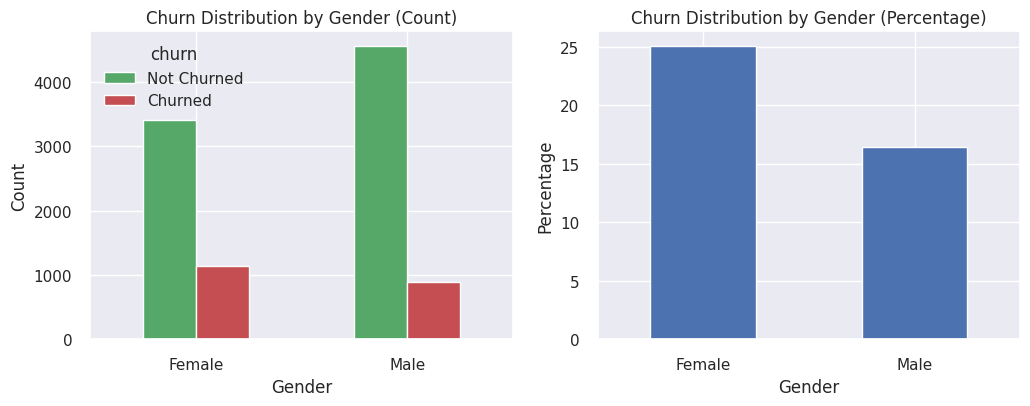

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby('Gender')['churn'].value_counts().unstack().fillna(0)

# Calculate the percentage within each gender group
grouped['Percentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Rename the columns for clarity
grouped.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Print the grouped DataFrame
print(grouped)

# Plot the count of churned and not churned for each gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped[['Not Churned', 'Churned']].plot(kind='bar', ax=ax1, rot=0, color=['g', 'r'])
ax1.set_title('Churn Distribution by Gender (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Gender')

# Plot the percentage of churn within each gender group
grouped['Percentage'].plot(kind='bar', ax=ax2, rot=0, color='b')
ax2.set_title('Churn Distribution by Gender (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Gender')

plt.show()


The count of Female churned is 3404 and for Male it is 898.

Ratio of Female to Male count = 3404/898 = 1:3 .
ie 25% are Female and 75% Male

In [1]:
3404/898

3.7906458797327396

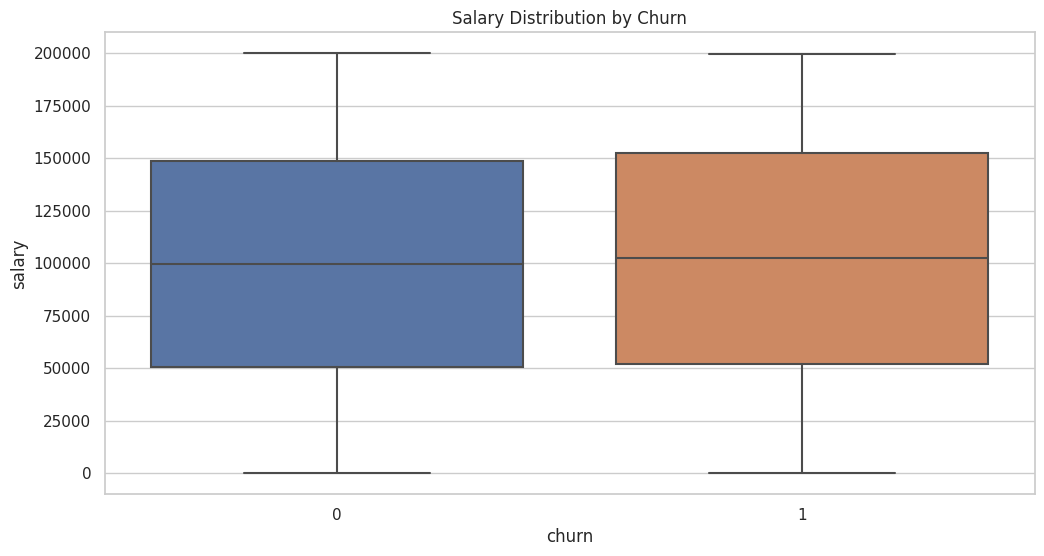

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="salary")
plt.title("Salary Distribution by Churn")
plt.show()


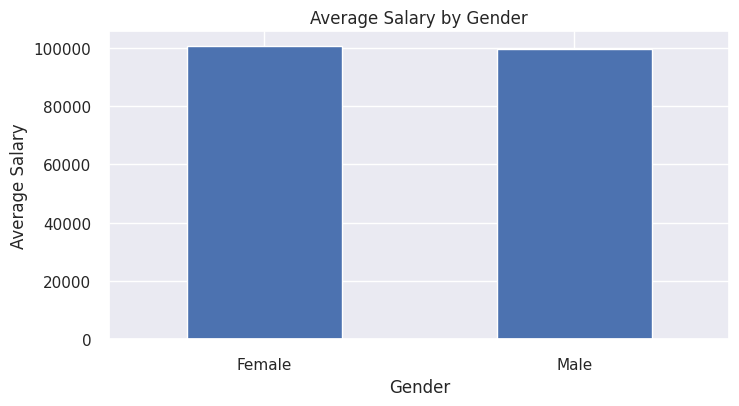

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby('Gender')['salary'].mean()

# Plot the average salary for each gender
fig, ax = plt.subplots(figsize=(8, 4))
grouped.plot(kind='bar', ax=ax, color='b', rot=0)

ax.set_title('Average Salary by Gender')
ax.set_ylabel('Average Salary')
ax.set_xlabel('Gender')

plt.show()


In [ ]:
import pandas as pd

# Group the DataFrame by 'Gender' and 'Salary'
grouped = customer_churn.groupby(['Gender', 'salary'])['churn']

# Calculate the count of churned and not churned for each gender and salary group
result = grouped.value_counts().unstack()

# Calculate the percentage within each gender and salary group
result['Percentage'] = (result[1] / (result[0] + result[1])) * 100

# Rename the columns for clarity
result.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Print the grouped DataFrame
print(result)


churn             Not Churned  Churned  Percentage
Gender salary                                     
Female 91.75              NaN      1.0         NaN
       178.19             1.0      NaN         NaN
       216.27             1.0      NaN         NaN
       236.45             NaN      1.0         NaN
       332.81             1.0      NaN         NaN
...                       ...      ...         ...
Male   199727.72          1.0      NaN         NaN
       199841.32          1.0      NaN         NaN
       199909.32          1.0      NaN         NaN
       199929.17          1.0      NaN         NaN
       199953.33          1.0      NaN         NaN

[9999 rows x 3 columns]


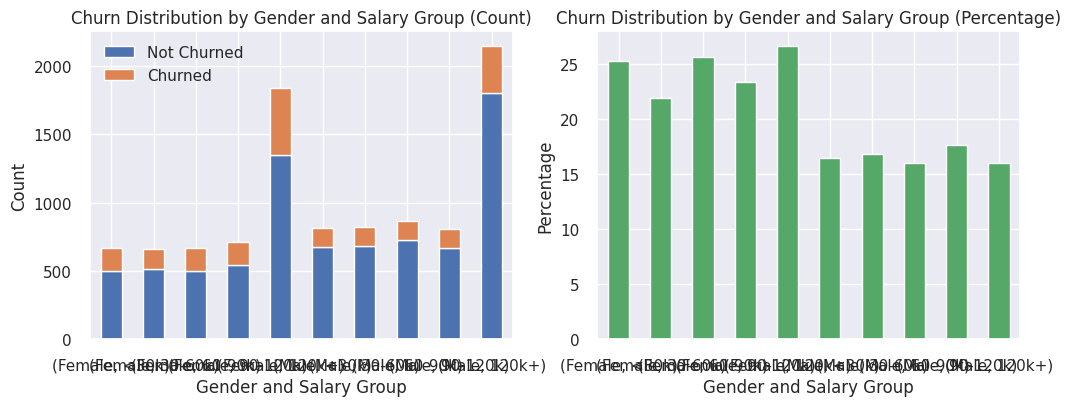

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Fill NaN values in the 'Salary' column with 0
customer_churn['salary'].fillna(0, inplace=True)

# Define salary bins (adjust the number of bins as needed)
salary_bins = [0, 30000, 60000, 90000, 120000, float('inf')]
salary_labels = ['<30k', '30-60k', '60-90k', '90-120k', '120k+']

# Create a new column 'Salary Group' based on salary bins
customer_churn['Salary Group'] = pd.cut(customer_churn['salary'], bins=salary_bins, labels=salary_labels)

# Group the DataFrame by 'Gender' and 'Salary Group'
grouped = customer_churn.groupby(['Gender', 'Salary Group'])['churn']

# Calculate the count of churned and not churned for each gender and salary group
result = grouped.value_counts().unstack()

# Calculate the percentage within each gender and salary group
result['Percentage'] = (result[1] / (result[0] + result[1])) * 100

# Rename the columns for clarity
result.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Plot the grouped DataFrame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
result[['Not Churned', 'Churned']].plot(kind='bar', stacked=True, ax=axes[0], rot=0)
result['Percentage'].plot(kind='bar', ax=axes[1], color='g', rot=0)

axes[0].set_title('Churn Distribution by Gender and Salary Group (Count)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Gender and Salary Group')
axes[0].legend(['Not Churned', 'Churned'])

axes[1].set_title('Churn Distribution by Gender and Salary Group (Percentage)')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Gender and Salary Group')

plt.show()


In [ ]:
# Get the numerical values for churned and not churned customers for each gender and salary group
churned_values = result['Churned']
not_churned_values = result['Not Churned']

# Get the percentages for churned customers
churned_percentages = result['Percentage']

# Assuming you want to retrieve values for a specific gender and salary group
gender = 'Male'  # Replace with 'Female' or the desired gender
salary_group = '<30k'  # Replace with the desired salary group

# Get the count and percentage for churned and not churned customers in the specific group
churned_count = churned_values.loc[gender, salary_group]
not_churned_count = not_churned_values.loc[gender, salary_group]
churned_percentage = churned_percentages.loc[gender, salary_group]

print(f"Gender: {gender}, Salary Group: {salary_group}")
print(f"Churned Count: {churned_count}")
print(f"Not Churned Count: {not_churned_count}")
print(f"Churned Percentage: {churned_percentage}%")


Gender: Male, Salary Group: <30k
Churned Count: 134
Not Churned Count: 679
Churned Percentage: 16.482164821648215%


In [ ]:
# Assuming you want to retrieve values for a specific gender and salary group
gender = 'Female'  # Replace with 'Male' or the desired gender
salary_group = '<30k'  # Replace with the desired salary group

# Get the count and percentage for churned and not churned customers in the specific group
churned_count = churned_values.loc[gender, salary_group]
not_churned_count = not_churned_values.loc[gender, salary_group]
churned_percentage = churned_percentages.loc[gender, salary_group]

print(f"Gender: {gender}, Salary Group: {salary_group}")
print(f"Churned Count: {churned_count}")
print(f"Not Churned Count: {not_churned_count}")
print(f"Churned Percentage: {churned_percentage}%")


Gender: Female, Salary Group: <30k
Churned Count: 168
Not Churned Count: 497
Churned Percentage: 25.263157894736842%


Females in Salary group of <30k churns more about 168 and Males churn less about a count of 134.

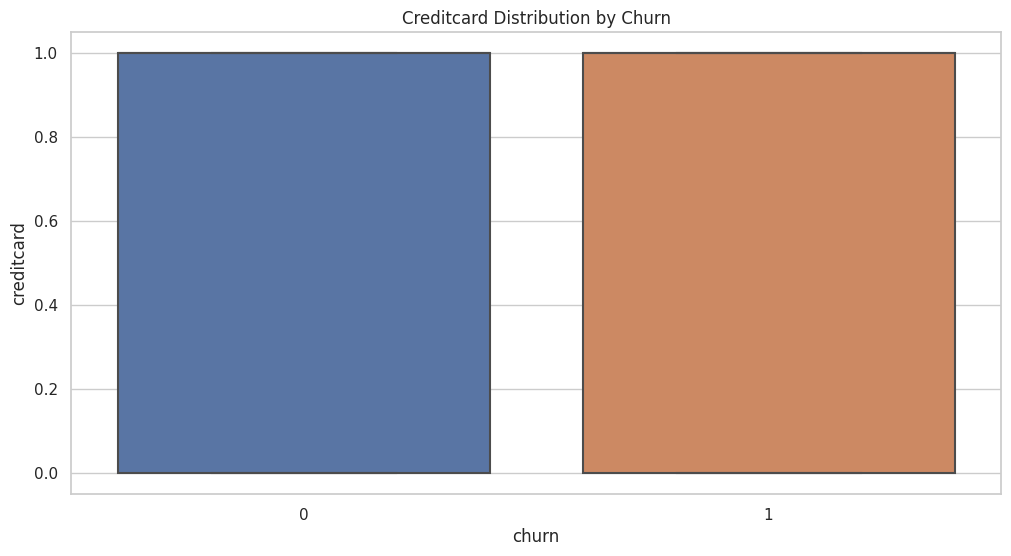

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="creditcard")
plt.title("Creditcard Distribution by Churn")
plt.show()


  A long rectangular box without a visible median line for both "Churn = 1" and "Churn = 0" in a box plot, it typically indicates that the data distribution of the "Creditcard" variable within both groups is highly skewed or that the data points are evenly distributed across the entire range.

In [ ]:
import pandas as pd

# Group the DataFrame by 'Gender' and 'CreditCard'
grouped = customer_churn.groupby(['Gender', 'creditcard'])['churn']

# Calculate the count of churned and not churned for each gender and credit card group
result = grouped.value_counts().unstack()

# Calculate the percentage within each gender and credit card group
result['Percentage'] = (result[1] / (result[0] + result[1])) * 100

# Rename the columns for clarity
result.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Print the grouped DataFrame
print(result)


churn              Not Churned  Churned  Percentage
Gender creditcard                                  
Female 0                  1007      344   25.462620
       1                  2397      795   24.906015
Male   0                  1325      269   16.875784
       1                  3234      629   16.282682


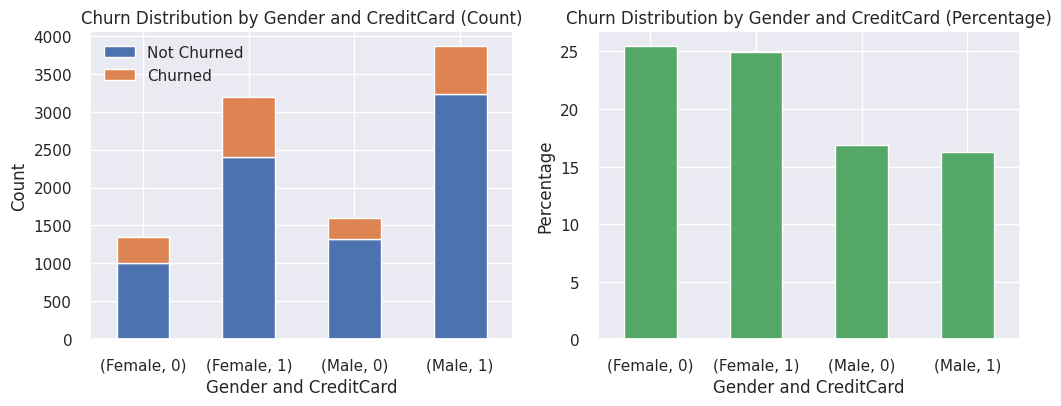

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'Gender' and 'CreditCard'
grouped = customer_churn.groupby(['Gender', 'creditcard'])['churn']

# Calculate the count of churned and not churned for each gender and credit card group
result = grouped.value_counts().unstack()

# Calculate the percentage within each gender and credit card group
result['Percentage'] = (result[1] / (result[0] + result[1])) * 100

# Rename the columns for clarity
result.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Plot the grouped DataFrame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
result[['Not Churned', 'Churned']].plot(kind='bar', stacked=True, ax=axes[0], rot=0)
result['Percentage'].plot(kind='bar', ax=axes[1], color='g', rot=0)

axes[0].set_title('Churn Distribution by Gender and CreditCard (Count)')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Gender and CreditCard')
axes[0].legend(['Not Churned', 'Churned'])

axes[1].set_title('Churn Distribution by Gender and CreditCard (Percentage)')
axes[1].set_ylabel('Percentage')
axes[1].set_xlabel('Gender and CreditCard')

plt.show()


churn              Not Churned  Churned  Percentage
Gender creditcard                                  
Female 0                  1007      344   25.462620
       1                  2397      795   24.906015
Male   0                  1325      269   16.875784
       1                  3234      629   16.282682


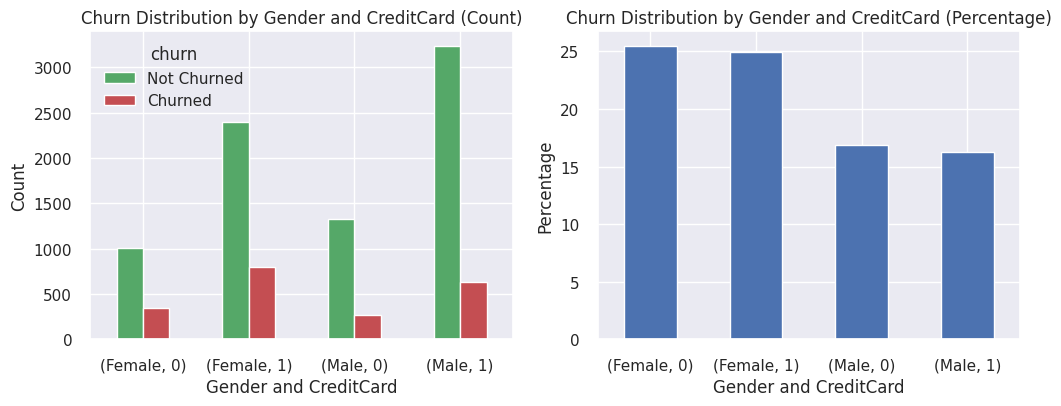

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['Gender', 'creditcard'])['churn'].value_counts().unstack().fillna(0)

# Calculate the percentage within each gender and credit card group
grouped['Percentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Rename the columns for clarity
grouped.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Print the grouped DataFrame
print(grouped)

# Plot the count of churned and not churned for each gender and credit card
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped[['Not Churned', 'Churned']].plot(kind='bar', ax=ax1, rot=0, color=['g', 'r'])
ax1.set_title('Churn Distribution by Gender and CreditCard (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Gender and CreditCard')

# Plot the percentage of churn within each gender and credit card group
grouped['Percentage'].plot(kind='bar', ax=ax2, rot=0, color='b')
ax2.set_title('Churn Distribution by Gender and CreditCard (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Gender and CreditCard')

plt.show()


churn       Not Churned  Churned  Percentage
creditcard                                  
0                  2332      613   20.814941
1                  5631     1424   20.184266


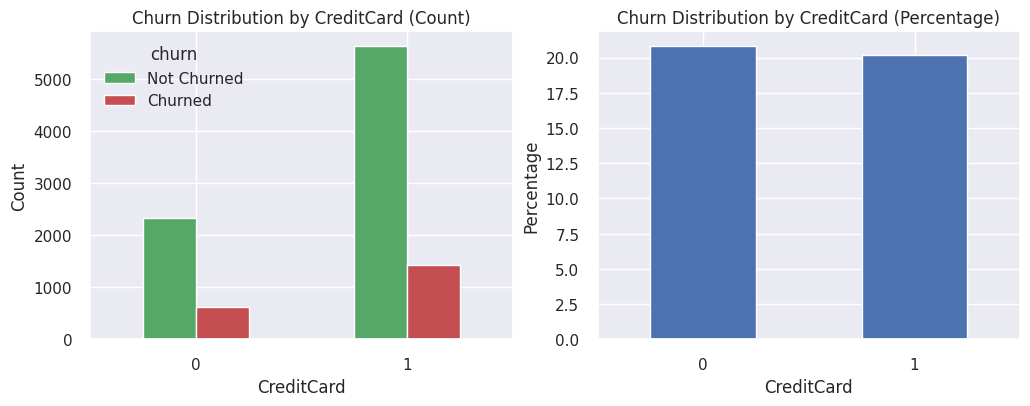

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['creditcard', 'churn'])['Gender'].count().unstack().fillna(0)

# Calculate the percentage within each credit card group
grouped['Percentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Rename the columns for clarity
grouped.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Print the grouped DataFrame
print(grouped)

# Plot the count of churned and not churned for each credit card
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped[['Not Churned', 'Churned']].plot(kind='bar', ax=ax1, rot=0, color=['g', 'r'])
ax1.set_title('Churn Distribution by CreditCard (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('CreditCard')

# Plot the percentage of churn within each credit card group
grouped['Percentage'].plot(kind='bar', ax=ax2, rot=0, color='b')
ax2.set_title('Churn Distribution by CreditCard (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('CreditCard')

plt.show()


Those with Creditcard churn more than those without creditcard.

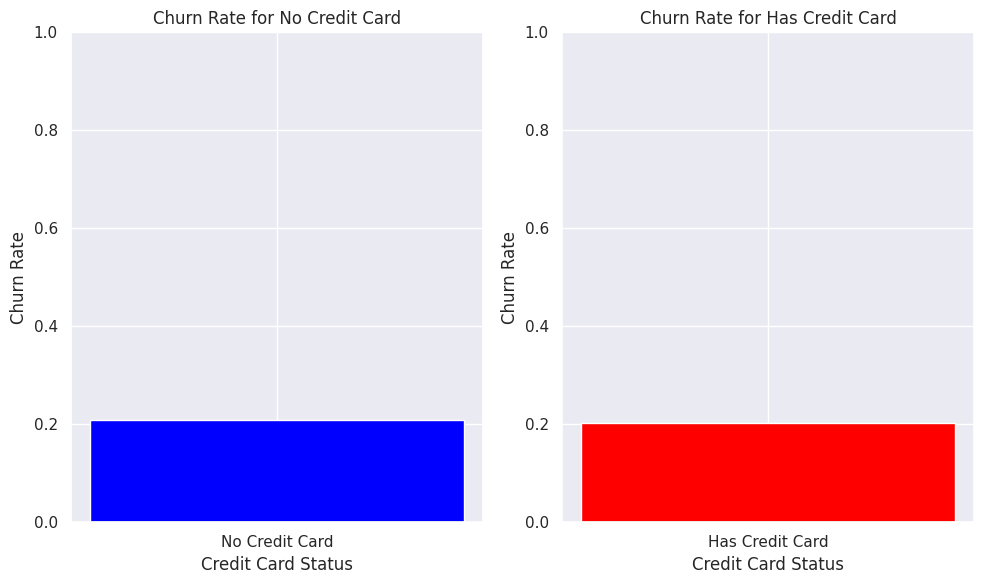

In [38]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'CreditCard' columns, where 'CreditCard' is 0 or 1.

# Separate data by Churn status
churned = customer_churn[customer_churn['churn'] == 1]
not_churned = customer_churn[customer_churn['churn'] == 0]

# Separate data by CreditCard status
NoCreditCard = customer_churn[customer_churn['creditcard'] == 0]
hascredit = customer_churn[customer_churn['creditcard'] == 1]

# Create bar charts to show the relationship between CreditCard and Churn
plt.figure(figsize=(10, 6))

# Churn rates for 'No Credit Card'
churn_rate_no_credit_card = NoCreditCard['churn'].mean()
plt.subplot(1, 2, 1)
plt.bar(['No Credit Card'], [churn_rate_no_credit_card], color='blue')
plt.title('Churn Rate for No Credit Card')
plt.xlabel('Credit Card Status')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)

# Churn rates for 'Has Credit Card'
churn_rate_has_credit_card = hascredit['churn'].mean()
plt.subplot(1, 2, 2)
plt.bar(['Has Credit Card'], [churn_rate_has_credit_card], color='red')
plt.title('Churn Rate for Has Credit Card')
plt.xlabel('Credit Card Status')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


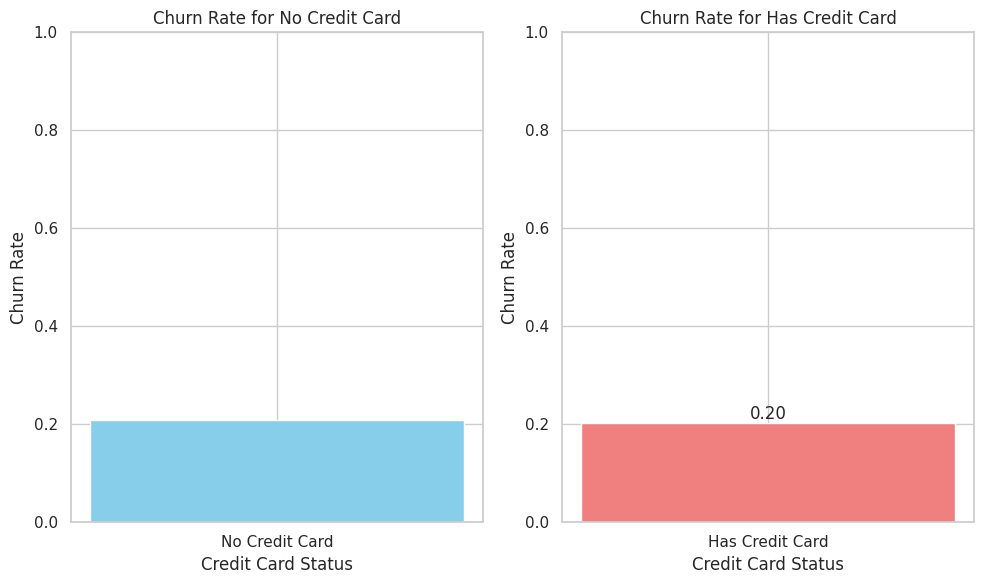

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'CreditCard' columns, where 'CreditCard' is 0 or 1.

# Separate data by Churn status
churned = customer_churn[customer_churn['churn'] == 1]
not_churned = customer_churn[customer_churn['churn'] == 0]

# Separate data by CreditCard status
NoCreditCard = customer_churn[customer_churn['creditcard'] == 0]
hascredit = customer_churn[customer_churn['creditcard'] == 1]

# Create bar charts to show the relationship between CreditCard and Churn
plt.figure(figsize=(10, 6))

# Churn rates for 'No Credit Card'
churn_rate_no_credit_card = NoCreditCard['churn'].mean()
plt.subplot(1, 2, 1)
bars = plt.bar(['No Credit Card'], [churn_rate_no_credit_card], color='skyblue')
plt.title('Churn Rate for No Credit Card')
plt.xlabel('Credit Card Status')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)

# Churn rates for 'Has Credit Card'
churn_rate_has_credit_card = hascredit['churn'].mean()
plt.subplot(1, 2, 2)
bars = plt.bar(['Has Credit Card'], [churn_rate_has_credit_card], color='lightcoral')
plt.title('Churn Rate for Has Credit Card')
plt.xlabel('Credit Card Status')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)

# Add churn rate labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


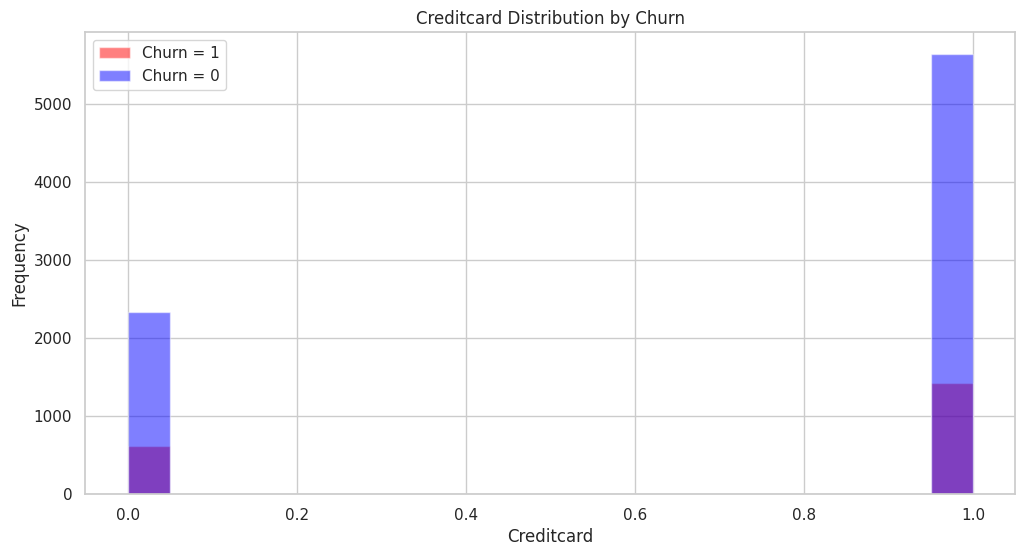

In [ ]:
import matplotlib.pyplot as plt

# Separate data by Churn status
churned = customer_churn[customer_churn['churn'] == 1]
not_churned = customer_churn[customer_churn['churn'] == 0]

# Create histograms for Creditcard within each group
plt.figure(figsize=(12, 6))
plt.hist(churned['creditcard'], bins=20, alpha=0.5, label='Churn = 1', color='red')
plt.hist(not_churned['creditcard'], bins=20, alpha=0.5, label='Churn = 0', color='blue')
plt.xlabel('Creditcard')
plt.ylabel('Frequency')
plt.title('Creditcard Distribution by Churn')
plt.legend()
plt.show()


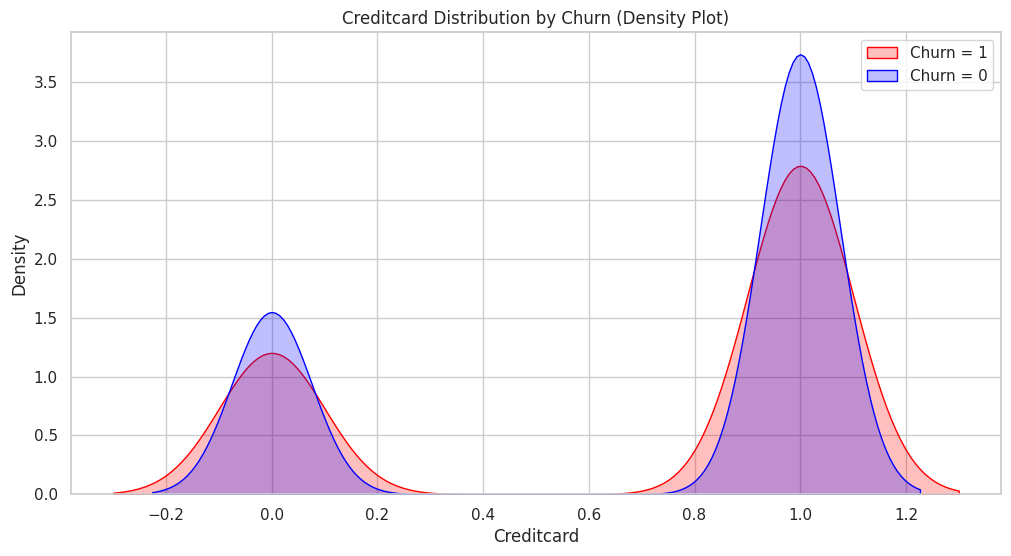

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(churned['creditcard'], label='Churn = 1', color='red', shade=True)
sns.kdeplot(not_churned['creditcard'], label='Churn = 0', color='blue', shade=True)
plt.xlabel('Creditcard')
plt.ylabel('Density')
plt.title('Creditcard Distribution by Churn (Density Plot)')
plt.legend()
plt.show()


Density Values Above 0.6 for Churned Customers and Above 0.4 for Non-Churned Customers:

This suggests that the "Creditcard" variable has a relatively high density of values in the range above 0.6 for churned customers and above 0.4 for non-churned customers.
It indicates that a significant portion of the data falls within these density ranges for both groups.
Higher Density for Non-Churned Customers in the Range Above 1.6 and Churned Customers in the Range Above 1.2:

When you observe higher density values for non-churned customers in the range above 1.6 and for churned customers in the range above 1.2, it suggests that there may be a concentration of "Creditcard" values in these specific ranges.
This could imply that for a portion of non-churned customers, the "Creditcard" values are more densely packed above 1.6, while for a portion of churned customers, the values are more densely packed above 1.2.
In summary, the density plot provides a more detailed view of the distribution of "Creditcard" values for both churned and non-churned customers. It indicates the concentration of values within specific ranges, with the density values representing the likelihood of finding values in those ranges. The differences in density values between the two groups can be indicative of variations in "Creditcard" usage patterns or behaviors between customers who have churned and those who have not.







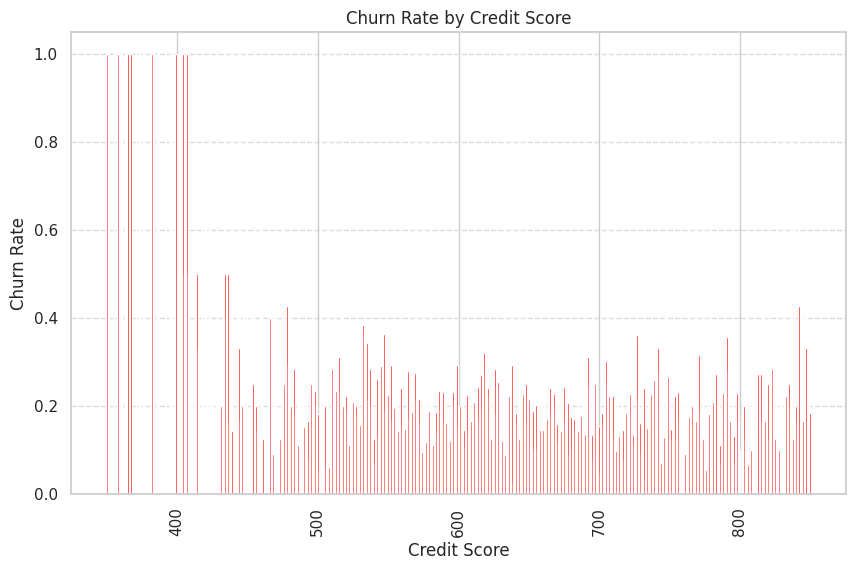

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'CreditScore' columns.

# Create bar plots to show churn by credit score
plt.figure(figsize=(10, 6))

# Group the data by 'CreditScore' and calculate the churn rate (mean of Churn column)
churn_by_credit_score = customer_churn.groupby('CreditScore')['churn'].mean()

# Plot the churn rate
plt.bar(churn_by_credit_score.index, churn_by_credit_score, color='red', width=1.0)
plt.title('Churn Rate by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


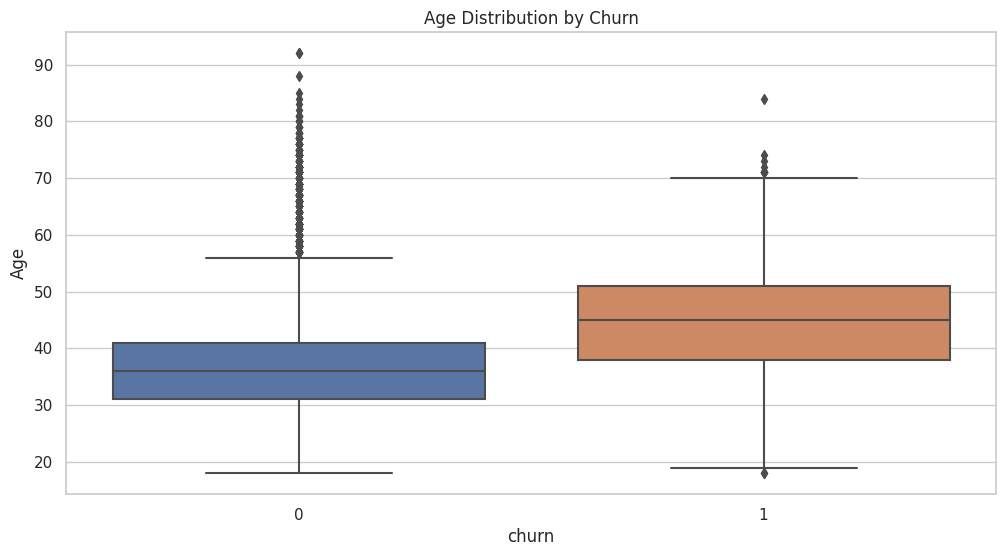

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="Age")
plt.title("Age Distribution by Churn")
plt.show()


The differences in the shape, width, and position of the boxes indicate that the distribution of customer ages for non-churned customers is more concentrated, less variable, and possibly centered around a specific age range, as represented by the narrow box and lower position. In contrast, the distribution of customer ages for churned customers appears to be more variable and balanced, as indicated by the wider box. These differences provide insights into how the age distribution varies between customers who have churned and those who have not.Outliers Above the Box: Individual data points or values that fall above the box's upper whisker are considered outliers. These outliers have ages that are notably higher than the typical ages of non-churned customers.

Churn Percentage by Age Group:
Age
(17.926, 25.4]     7.528642
(25.4, 32.8]       7.664066
(32.8, 40.2]      13.033894
(40.2, 47.6]      30.037413
(47.6, 55.0]      54.395604
(55.0, 62.4]      50.113379
(62.4, 69.8]      27.884615
(69.8, 77.2]      11.023622
(77.2, 84.6]       5.000000
(84.6, 92.0]       0.000000
Name: churn, dtype: float64


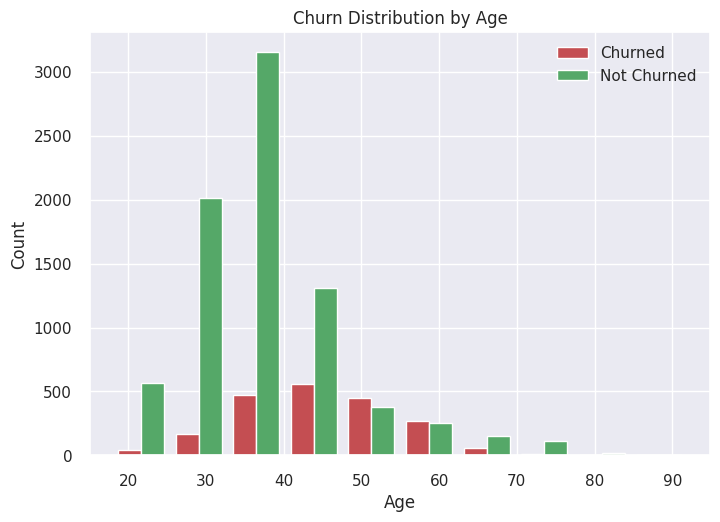

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
# You may want to adjust the number of bins and other parameters
n_bins = 10  # Adjust the number of bins for age groups

# Create a histogram of the churn distribution by age
plt.hist([customer_churn[customer_churn['churn'] == 1]['Age'], customer_churn[customer_churn['churn'] == 0]['Age']], bins=n_bins, label=['Churned', 'Not Churned'], color=['r', 'g'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Churn Distribution by Age')
plt.legend()

# Calculate the percentage of churn within each age group
age_groups = pd.cut(customer_churn['Age'], bins=n_bins)
age_churn_percentage = customer_churn.groupby(age_groups)['churn'].mean() * 100

# Print the percentage of churn for each age group
print('Churn Percentage by Age Group:')
print(age_churn_percentage)

plt.show()


Age group in the 40's churn more than early 20s.

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'customer_churn'
churned_ages = customer_churn[customer_churn['churn'] == 1]['Age']

# Print the exact age values at which customers churned
print("Ages at which customers churned:")
print(churned_ages)


Ages at which customers churned:
0       42
2       42
5       44
7       29
16      58
        ..
9981    42
9982    46
9991    53
9997    36
9998    42
Name: Age, Length: 2037, dtype: int64


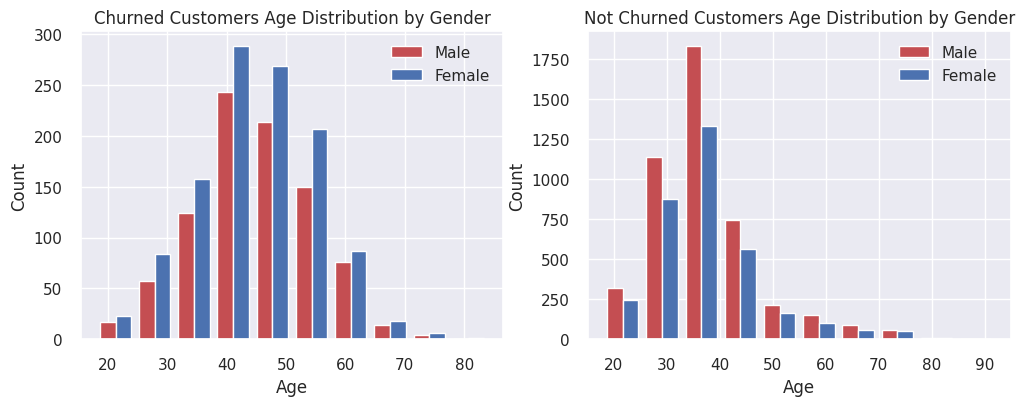

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
churned_customers = customer_churn[customer_churn['churn'] == 1]
not_churned_customers = customer_churn[customer_churn['churn'] == 0]

# Create subplots for each gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the age distribution of churned customers for each gender
ax1.hist([churned_customers[churned_customers['Gender'] == 'Male']['Age'],
          churned_customers[churned_customers['Gender'] == 'Female']['Age']],
          bins=10, color=['r', 'b'], label=['Male', 'Female'])
ax1.set_title('Churned Customers Age Distribution by Gender')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.legend()

# Plot the age distribution of not churned customers for each gender
ax2.hist([not_churned_customers[not_churned_customers['Gender'] == 'Male']['Age'],
          not_churned_customers[not_churned_customers['Gender'] == 'Female']['Age']],
          bins=10, color=['r', 'b'], label=['Male', 'Female'])
ax2.set_title('Not Churned Customers Age Distribution by Gender')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.legend()

plt.show()


Female customers in the age group of 40-50 churn more than Male customers.The plot also show Non churned customers more in Male category in the range 30-40's age group.

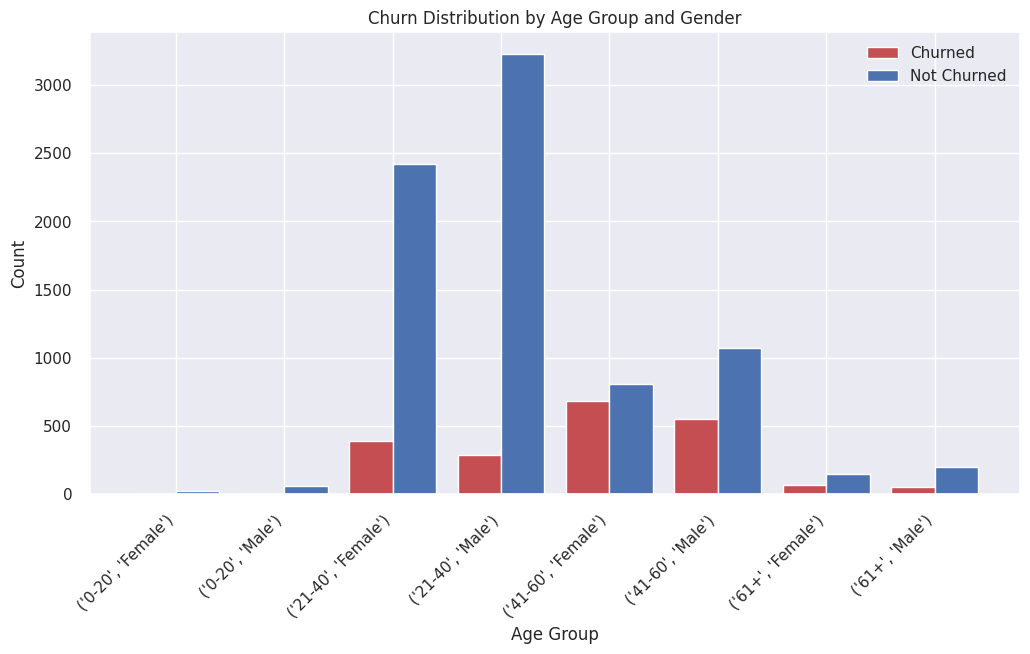

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create age groups (e.g., 0-20, 21-40, 41-60, 61+)
bins = [0, 20, 40, 60, 120]
labels = ['0-20', '21-40', '41-60', '61+']
customer_churn['AgeGroup'] = pd.cut(customer_churn['Age'], bins=bins, labels=labels)

# Group the data by age group, gender, and churn
grouped = customer_churn.groupby(['AgeGroup', 'Gender', 'churn']).size().unstack().fillna(0)

# Plot the grouped data
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.4
x = range(len(grouped.index))

churned_bars = ax.bar(x, grouped[1], width=width, label='Churned', color='r')
not_churned_bars = ax.bar([i + width for i in x], grouped[0], width=width, label='Not Churned', color='b')

ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Churn Distribution by Age Group and Gender')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(grouped.index, rotation=45, ha='right')  # Rotate labels to 45 degrees
ax.legend()

plt.show()


In [ ]:
import pandas as pd

# Create age groups (e.g., 0-20, 21-40, 41-60, 61+)
bins = [0, 20, 40, 60, 120]
labels = ['0-20', '21-40', '41-60', '61+']
customer_churn['AgeGroup'] = pd.cut(customer_churn['Age'], bins=bins, labels=labels)

# Group the data by age group and churn
grouped = customer_churn.groupby(['AgeGroup', 'churn']).size().unstack().fillna(0)

# Calculate the percentage of churn for each age group
grouped['ChurnPercentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Find the age group with the highest churn percentage
max_churn_age_group = grouped['ChurnPercentage'].idxmax()
max_churn_percentage = grouped['ChurnPercentage'].max()

print(f"The age group with the highest churn percentage is {max_churn_age_group} with {max_churn_percentage:.2f}% churn.")


The age group with the highest churn percentage is 41-60 with 39.65% churn.


churn       Not Churned  Churned  Percentage
Age Gender                                  
18  Female          4.0      0.0    0.000000
    Male           16.0      2.0   11.111111
19  Female          8.0      1.0   11.111111
    Male           18.0      0.0    0.000000
20  Female         12.0      1.0    7.692308
...                 ...      ...         ...
84  Female          0.0      1.0  100.000000
    Male            1.0      0.0    0.000000
85  Female          1.0      0.0    0.000000
88  Male            1.0      0.0    0.000000
92  Male            2.0      0.0    0.000000

[135 rows x 3 columns]


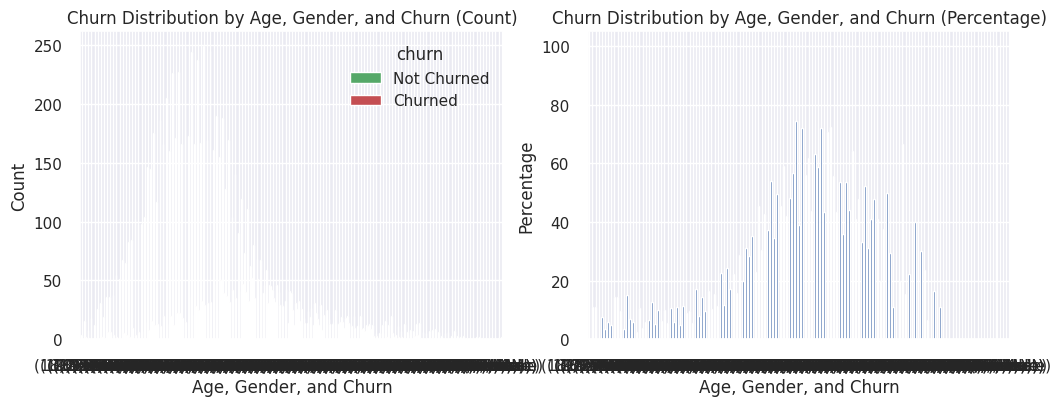

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['Age', 'Gender'])['churn'].value_counts().unstack().fillna(0)

# Calculate the percentage within each age, gender, and churn group
grouped['Percentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Rename the columns for clarity
grouped.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Print the grouped DataFrame
print(grouped)

# Plot the count of churned and not churned for each age, gender, and churn status
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped[['Not Churned', 'Churned']].plot(kind='bar', ax=ax1, rot=0, color=['g', 'r'])
ax1.set_title('Churn Distribution by Age, Gender, and Churn (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Age, Gender, and Churn')

# Plot the percentage of churn within each age, gender, and churn group
grouped['Percentage'].plot(kind='bar', ax=ax2, rot=0, color='b')
ax2.set_title('Churn Distribution by Age, Gender, and Churn (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Age, Gender, and Churn')

plt.show()


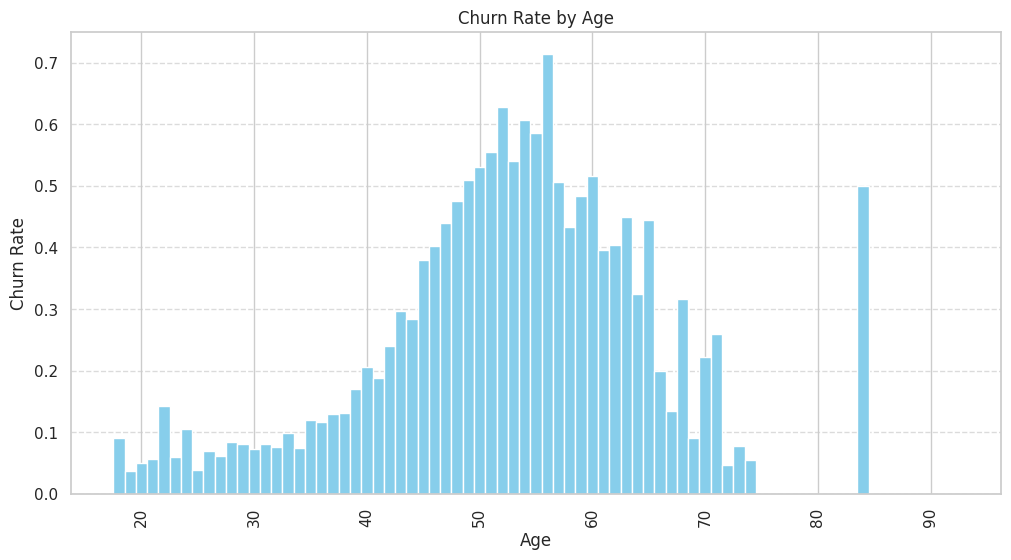

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'Age' columns.

# Create bar plots to show churn by age
plt.figure(figsize=(12, 6))

# Group the data by 'Age' and calculate the churn rate (mean of Churn column)
churn_by_age = customer_churn.groupby('Age')['churn'].mean()

# Plot the churn rate
plt.bar(churn_by_age.index, churn_by_age, color='skyblue', width=1.0)
plt.title('Churn Rate by Age')
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
customer_churn['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [43]:
customer_churn['Age'].nunique()

70

In [ ]:
customer_churn['Age'].min()

18

In [ ]:
customer_churn['Age'].max()

92

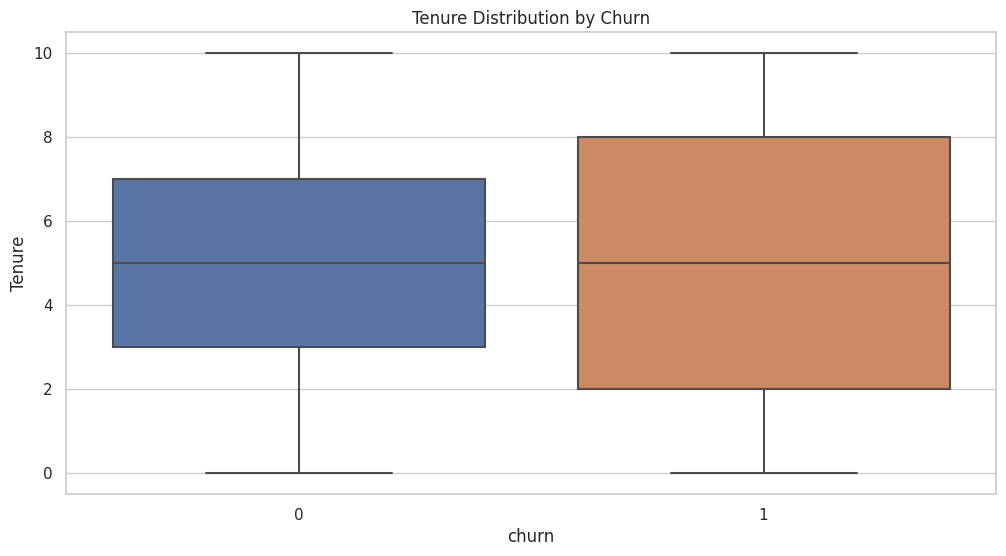

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="Tenure")
plt.title("Tenure Distribution by Churn")
plt.show()


A rectangular box with a line at the center typically indicates that the distribution of customer tenure (length of time with the company) for non-churned customers is relatively symmetrical and balanced.
The line at the center of the box represents the median tenure value for non-churned customers.
This suggests that for non-churned customers, the middle 50% of the tenure values is centered around the median, and there is a relatively equal spread of values on both sides of the median.

The larger box suggests that the middle 50% of the tenure values for churned customers is more spread out, with potentially a wider range of tenure values.
This implies that there is greater variability in tenure among customers who have churned, and the median tenure value may not be as representative of the entire group.

In summary, the box plot reveals differences in the distribution and variability of customer tenure between those who have not churned and those who have churned. A larger box for the churned group suggests more variability in tenure values, while a smaller and more symmetric box for the non-churned group indicates a more balanced distribution. The median line in both cases represents the central value around which the majority of tenure values are clustered.

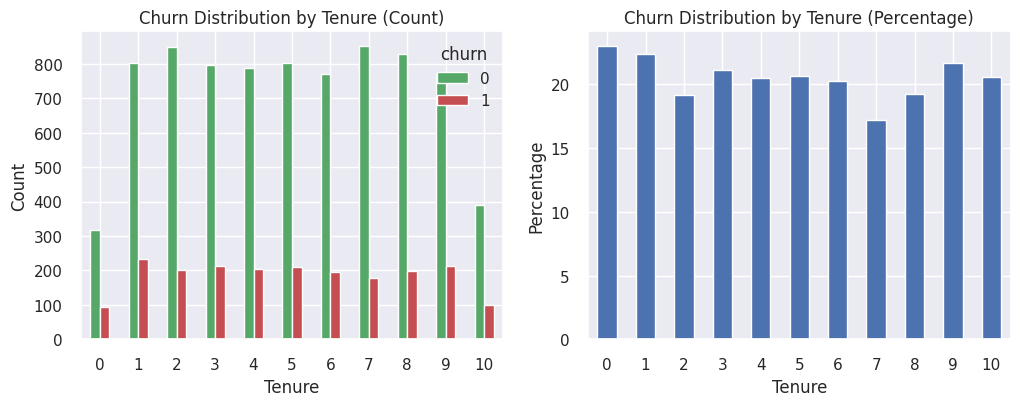

For tenure 10:
Churned Count: 101
Not Churned Count: 389
Churned Percentage: 20.61%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['Tenure', 'churn'])['churn'].count().unstack().fillna(0)

# Calculate the percentage within each tenure group
grouped['ChurnPercentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Plot the count of churned and not churned for each tenure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped[[0, 1]].plot(kind='bar', ax=ax1, rot=0, color=['g', 'r'])
ax1.set_title('Churn Distribution by Tenure (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Tenure')

# Plot the percentage of churn within each tenure group
grouped['ChurnPercentage'].plot(kind='bar', ax=ax2, rot=0, color='b')
ax2.set_title('Churn Distribution by Tenure (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Tenure')

plt.show()

# Retrieve the values and percentages for a specific tenure
tenure = 10  # Replace with the desired tenure value
churned_count = grouped[1].loc[tenure]
not_churned_count = grouped[0].loc[tenure]
churned_percentage = grouped['ChurnPercentage'].loc[tenure]

print(f"For tenure {tenure}:")
print(f"Churned Count: {churned_count}")
print(f"Not Churned Count: {not_churned_count}")
print(f"Churned Percentage: {churned_percentage:.2f}%")


Maximum of churn happens at Tenure 2.

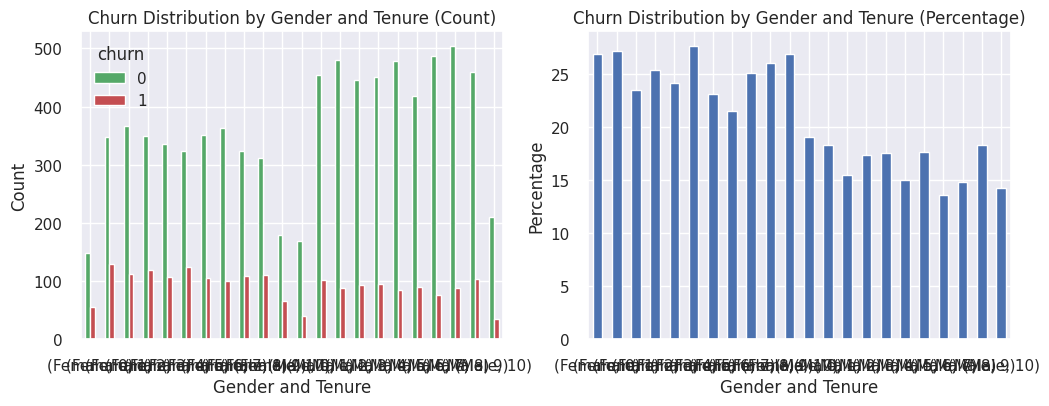

For tenure 10 and gender Male:
Churned Count: 35
Not Churned Count: 210
Churned Percentage: 14.29%
For tenure 10 and gender Male (Female):
Churned Count: 66
Not Churned Count: 179
Churned Percentage: 26.94%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['Gender', 'Tenure', 'churn'])['churn'].count().unstack().fillna(0)

# Calculate the percentage within each tenure group for each gender
grouped['ChurnPercentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Plot the count of churned and not churned for each tenure by gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped[[0, 1]].plot(kind='bar', ax=ax1, rot=0, color=['g', 'r'])
ax1.set_title('Churn Distribution by Gender and Tenure (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Gender and Tenure')

# Plot the percentage of churn within each tenure group for each gender
grouped['ChurnPercentage'].plot(kind='bar', ax=ax2, rot=0, color='b')
ax2.set_title('Churn Distribution by Gender and Tenure (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Gender and Tenure')

plt.show()

# Retrieve the values and percentages for a specific tenure and gender
tenure = 10  # Replace with the desired tenure value
gender = 'Male'  # Replace with 'Female' or the desired gender
churned_count = grouped[1].loc[gender, tenure]
not_churned_count = grouped[0].loc[gender, tenure]
churned_percentage = grouped['ChurnPercentage'].loc[gender, tenure]

print(f"For tenure {tenure} and gender {gender}:")
print(f"Churned Count: {churned_count}")
print(f"Not Churned Count: {not_churned_count}")
print(f"Churned Percentage: {churned_percentage:.2f}%")

churned_count_female = grouped[1].loc['Female', tenure]
not_churned_count_female = grouped[0].loc['Female', tenure]
churned_percentage_female = grouped['ChurnPercentage'].loc['Female', tenure]


print(f"For tenure {tenure} and gender {gender} (Female):")
print(f"Churned Count: {churned_count_female}")
print(f"Not Churned Count: {not_churned_count_female}")
print(f"Churned Percentage: {churned_percentage_female:.2f}%")


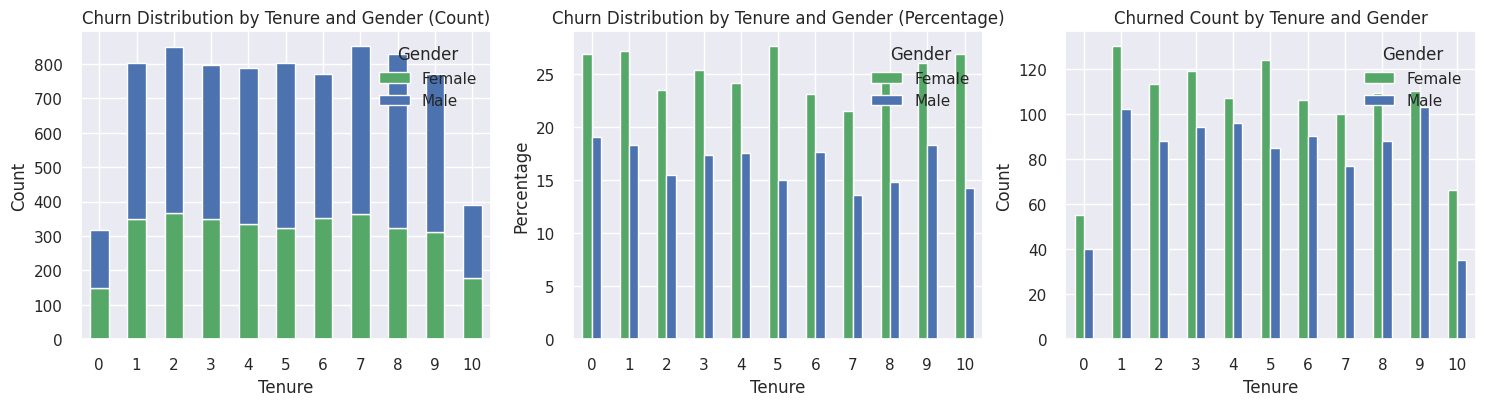

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['Tenure', 'Gender'])['churn'].value_counts().unstack().fillna(0)

# Calculate the percentage within each tenure and gender group
grouped['ChurnPercentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Rename the columns for clarity
grouped.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Create the plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

# Plot the count of churned and not churned for each tenure and gender
grouped['Not Churned'].unstack().plot(kind='bar', stacked=True, ax=ax1, rot=0, color=['g', 'b'])
ax1.set_title('Churn Distribution by Tenure and Gender (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Tenure')

# Plot the percentage of churn within each tenure and gender group
grouped['ChurnPercentage'].unstack().plot(kind='bar', ax=ax2, rot=0, color=['g', 'b'])
ax2.set_title('Churn Distribution by Tenure and Gender (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Tenure')

# Plot the churned count for both Male and Female
churned_counts = grouped['Churned'].unstack()
churned_counts.plot(kind='bar', ax=ax3, rot=0, color=['g', 'b'])
ax3.set_title('Churned Count by Tenure and Gender')
ax3.set_ylabel('Count')
ax3.set_xlabel('Tenure')

plt.show()


In [ ]:
# Group the DataFrame by 'Tenure' and 'Gender' and calculate the churn count
tenure_gender_churn = customer_churn.groupby(['Tenure', 'Gender'])['churn'].sum().unstack()

# Find the tenure with the highest churn count
max_churned_tenure = tenure_gender_churn.sum(axis=1).idxmax()

# Find the gender with the highest churn count for the specific tenure
gender_with_highest_churn = tenure_gender_churn.loc[max_churned_tenure].idxmax()

print(f"Tenure with the highest churn count: {max_churned_tenure}")
print(f"Gender with the highest churn count for tenure {max_churned_tenure}: {gender_with_highest_churn}")


Tenure with the highest churn count: 1
Gender with the highest churn count for tenure 1: Female


In [ ]:
# Find the customer IDs and surnames of customers in the tenure with the highest churn count
customers_in_max_churned_tenure = customer_churn[
    (customer_churn['Tenure'] == max_churned_tenure) &
    (customer_churn['Gender'] == gender_with_highest_churn)
]

customer_ids = customers_in_max_churned_tenure['CustomerId']
surnames = customers_in_max_churned_tenure['Surname']

# Print the customer IDs and surnames
for customer_id, surname in zip(customer_ids, surnames):
    print(f"Customer ID: {customer_id}, Surname: {surname}")


Customer ID: 15647311, Surname: Hill
Customer ID: 15701354, Surname: Boni
Customer ID: 15696061, Surname: Brownless
Customer ID: 15780961, Surname: Cavenagh
Customer ID: 15706021, Surname: Buley
Customer ID: 15804919, Surname: Dunbabin
Customer ID: 15698028, Surname: Duncan
Customer ID: 15671137, Surname: MacDonald
Customer ID: 15640905, Surname: Vasin
Customer ID: 15621075, Surname: Ogbonnaya
Customer ID: 15771977, Surname: T'ao
Customer ID: 15594917, Surname: Miller
Customer ID: 15787174, Surname: Sergeyev
Customer ID: 15599792, Surname: Dimauro
Customer ID: 15753754, Surname: Morrison
Customer ID: 15796505, Surname: Boyle
Customer ID: 15601274, Surname: Hsieh
Customer ID: 15735203, Surname: Seleznyov
Customer ID: 15625461, Surname: Amos
Customer ID: 15774696, Surname: Cole
Customer ID: 15646372, Surname: Outhwaite
Customer ID: 15803406, Surname: Ross
Customer ID: 15603156, Surname: Elewechi
Customer ID: 15798888, Surname: Pisano
Customer ID: 15671256, Surname: Macartney
Customer ID:

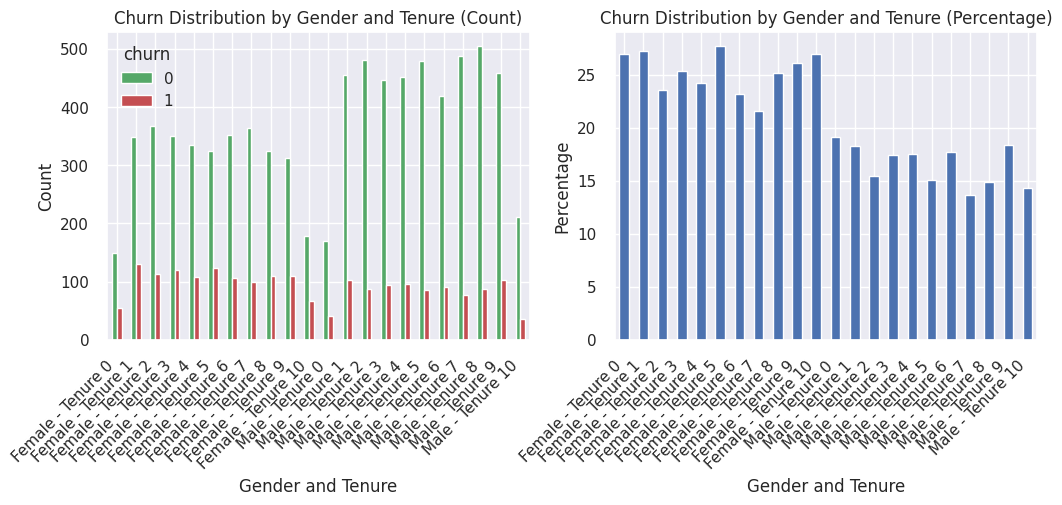

For tenure 10 and gender Male:
Churned Count: 35
Not Churned Count: 210
Churned Percentage: 14.29%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['Gender', 'Tenure', 'churn'])['churn'].count().unstack().fillna(0)

# Calculate the percentage within each tenure group for each gender
grouped['ChurnPercentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Plot the count of churned and not churned for each tenure by gender
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

grouped[[0, 1]].plot(kind='bar', ax=ax1, rot=0, color=['g', 'r'])
ax1.set_title('Churn Distribution by Gender and Tenure (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Gender and Tenure')

# Plot the percentage of churn within each tenure group for each gender
grouped['ChurnPercentage'].plot(kind='bar', ax=ax2, rot=0, color='b')
ax2.set_title('Churn Distribution by Gender and Tenure (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Gender and Tenure')

# Set custom x-axis labels
x_labels = [f"{gender} - Tenure {tenure}" for gender, tenure in grouped.index]
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.set_xticks(range(len(x_labels)))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')

plt.show()

# Retrieve the values and percentages for a specific tenure and gender
tenure = 10  # Replace with the desired tenure value
gender = 'Male'  # Replace with 'Female' or the desired gender
churned_count = grouped[1].loc[gender, tenure]
not_churned_count = grouped[0].loc[gender, tenure]
churned_percentage = grouped['ChurnPercentage'].loc[gender, tenure]

print(f"For tenure {tenure} and gender {gender}:")
print(f"Churned Count: {churned_count}")
print(f"Not Churned Count: {not_churned_count}")
print(f"Churned Percentage: {churned_percentage:.2f}%")


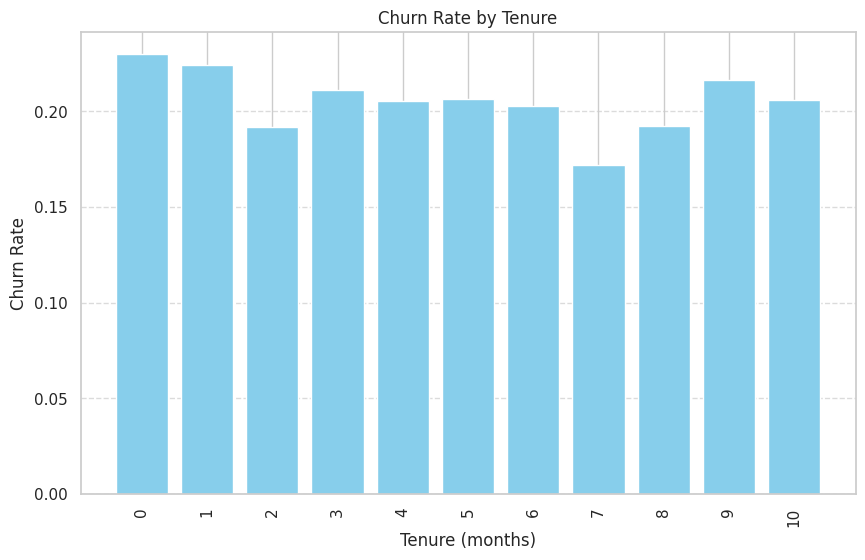

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'Tenure' columns.

# Create bar charts to show churn by tenure
plt.figure(figsize=(10, 6))

# Group the data by 'Tenure' and calculate the churn rate (mean of Churn column)
churn_by_tenure = customer_churn.groupby('Tenure')['churn'].mean()

# Plot the churn rate
churn_by_tenure.index = churn_by_tenure.index.astype(str)  # Convert index to string for better x-axis display
plt.bar(churn_by_tenure.index, churn_by_tenure, color='skyblue', width=0.8)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


The plot shows that 'Tenure' with a value of 0 has the highest churn rate, it suggests that customers who have been with your service provider for a very short period (possibly just starting) are more likely to churn. In other words, customers who have recently joined are at a higher risk of leaving the service compared to those who have been with the service provider for a longer period.

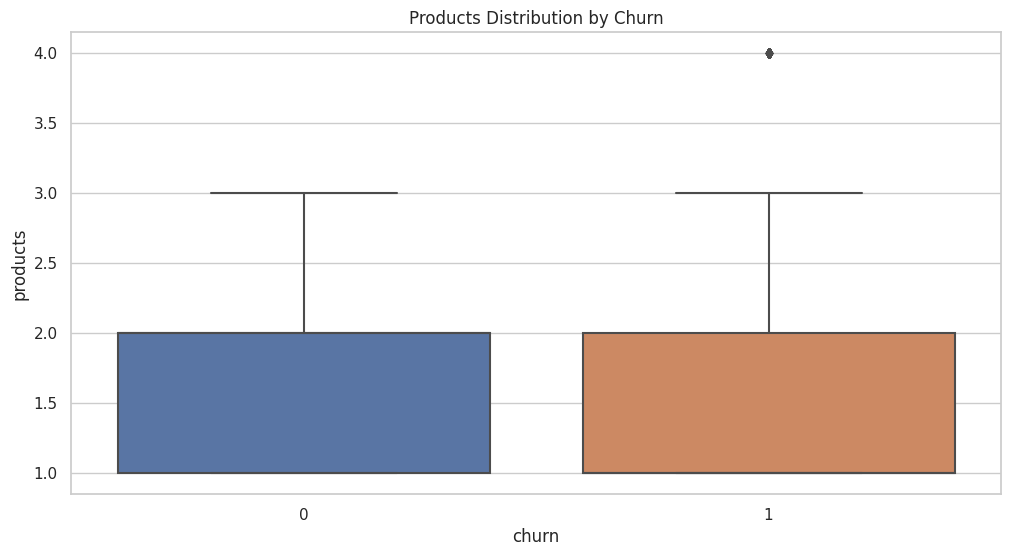

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="products")
plt.title("Products Distribution by Churn")
plt.show()


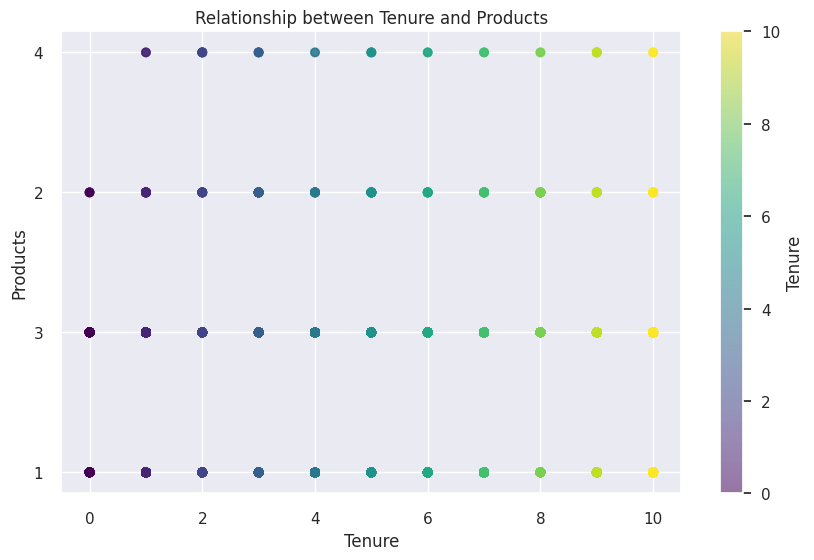

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
# Replace 'customer_churn' with your actual DataFrame

# Create a scatter plot to visualize the relationship between 'tenure' and 'products'
plt.figure(figsize=(10, 6))

# Assuming 'products' is a categorical variable, you can assign unique numerical values for the plot
# Replace 'products' with your actual column name
product_values = customer_churn['products'].astype('category').cat.codes

plt.scatter(customer_churn['Tenure'], product_values, c=customer_churn['Tenure'], cmap='viridis', alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('Tenure')
plt.xlabel('Tenure')
plt.ylabel('Products')

# Replace 'products' with your actual column name
product_labels = customer_churn['products'].unique()
plt.yticks(range(len(product_labels)), product_labels)

plt.title('Relationship between Tenure and Products')
plt.show()


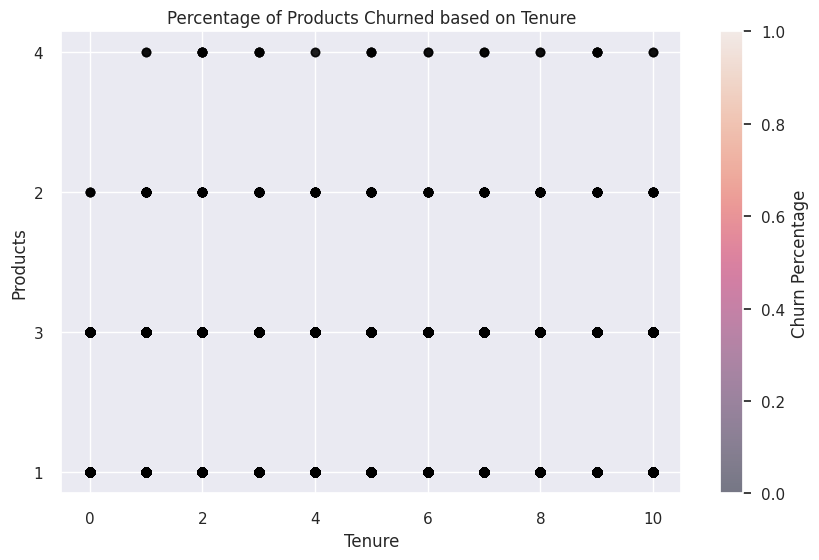

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
# Replace 'products' with your actual column name

# Calculate the total count of each unique 'products' category
product_counts = customer_churn['products'].value_counts()

# Calculate the count of churned customers for each 'products' category
churned_counts = customer_churn[customer_churn['churn'] == 'Yes']['products'].value_counts()

# Calculate the percentage of churn for each 'products' category based on tenure
churn_percentage = (churned_counts / product_counts) * 100

# Create a scatter plot to visualize the relationship between 'tenure' and 'products'
plt.figure(figsize=(10, 6))

product_values = customer_churn['products'].astype('category').cat.codes

plt.scatter(customer_churn['Tenure'], product_values, c=churn_percentage, cmap='viridis', alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('Churn Percentage')
plt.xlabel('Tenure')
plt.ylabel('Products')

product_labels = customer_churn['products'].unique()
plt.yticks(range(len(product_labels)), product_labels)

plt.title('Percentage of Products Churned based on Tenure')
plt.show()


products and churn are inversely proportional to Tenure.

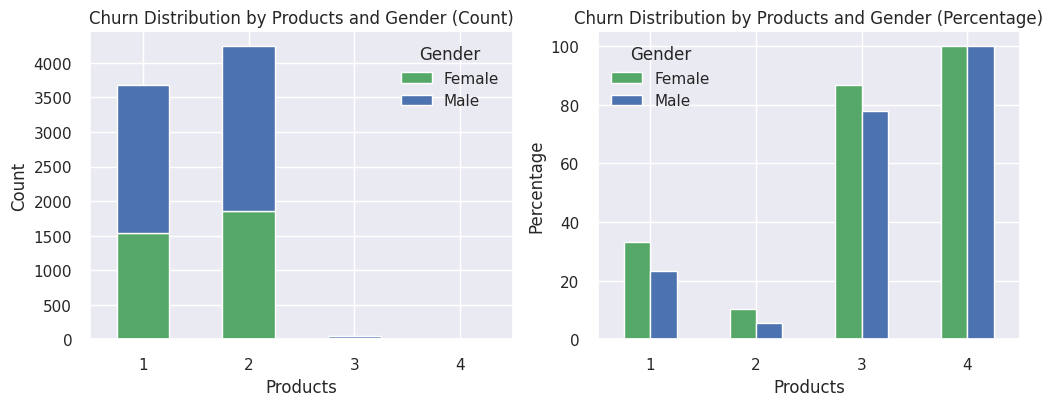

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['products', 'Gender'])['churn'].value_counts().unstack().fillna(0)

# Calculate the percentage within each product and gender group
grouped['ChurnPercentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Rename the columns for clarity
grouped.rename(columns={0: 'Not Churned', 1: 'Churned'}, inplace=True)

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count of churned and not churned for each product and gender
grouped['Not Churned'].unstack().plot(kind='bar', stacked=True, ax=ax1, rot=0, color=['g', 'b'])
ax1.set_title('Churn Distribution by Products and Gender (Count)')
ax1.set_ylabel('Count')
ax1.set_xlabel('Products')

# Plot the percentage of churn within each product and gender group
grouped['ChurnPercentage'].unstack().plot(kind='bar', ax=ax2, rot=0, color=['g', 'b'])
ax2.set_title('Churn Distribution by Products and Gender (Percentage)')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Products')

plt.show()


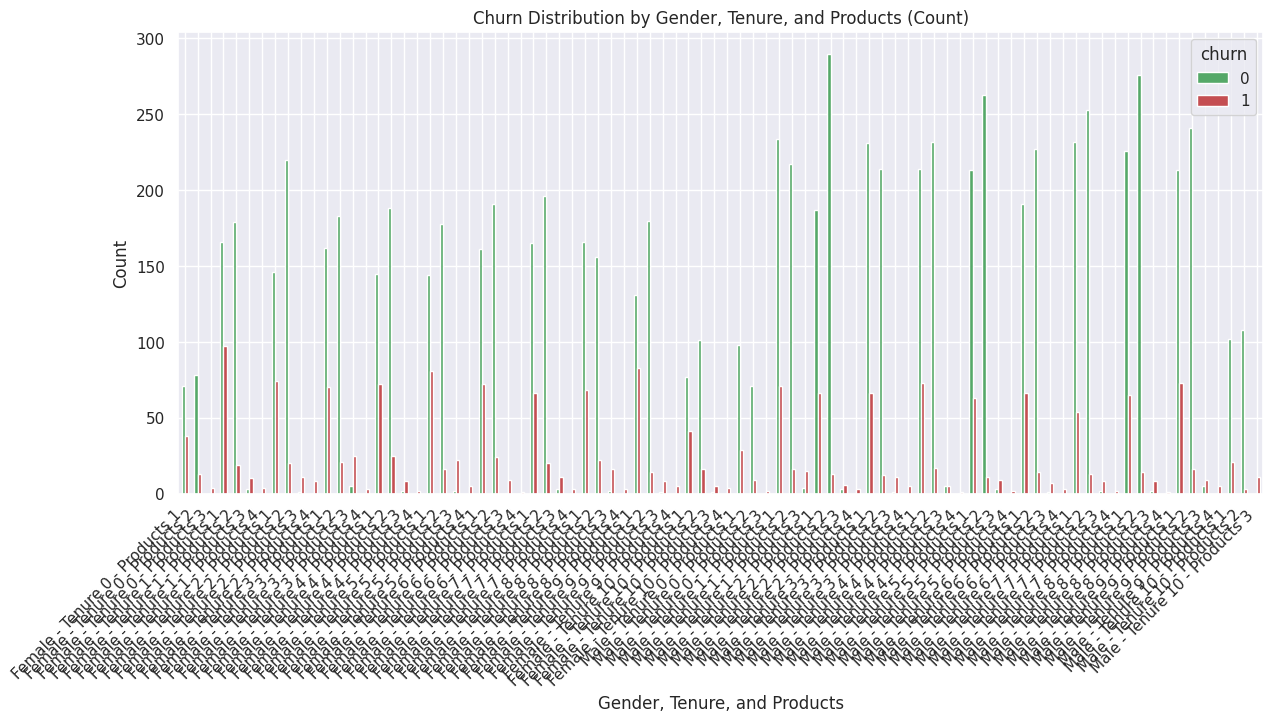

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn'
grouped = customer_churn.groupby(['Gender', 'Tenure', 'products', 'churn'])['churn'].count().unstack().fillna(0)

# Calculate the percentage within each tenure group for each gender
grouped['ChurnPercentage'] = (grouped[1] / (grouped[0] + grouped[1])) * 100

# Create the multi-level bar plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the count of churned and not churned for each gender, tenure, and products
grouped[[0, 1]].plot(kind='bar', ax=ax, rot=0, color=['g', 'r'])
ax.set_title('Churn Distribution by Gender, Tenure, and Products (Count)')
ax.set_ylabel('Count')
ax.set_xlabel('Gender, Tenure, and Products')

# Set custom x-axis labels
x_labels = [f"{gender} - Tenure {tenure} - Products {product}" for gender, tenure, product in grouped.index]
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

plt.show()

# Retrieve the values and percentages for a specific tenure, gender, and products
tenure = 10  # Replace with the desired tenure value
gender = 'Male'  # Replace with 'Female' or the desired gender
products =2 # Replace with the desired product name
churned_count = grouped[1].loc[gender, tenure, products]


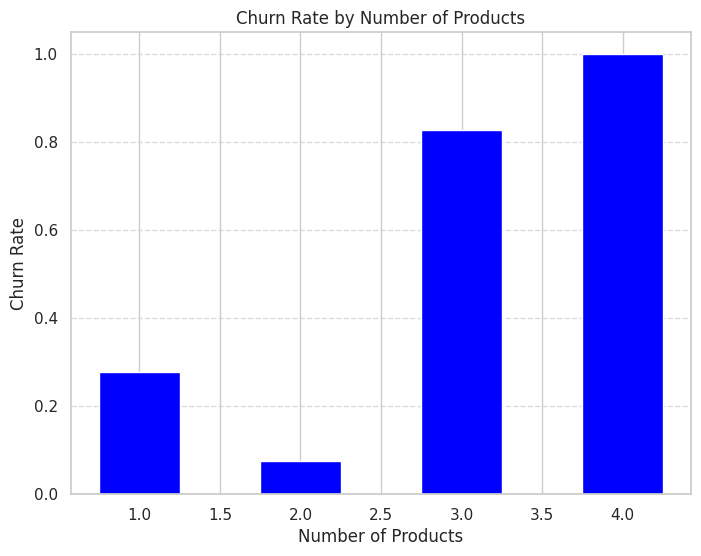

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'Products' columns.

# Create bar chart to show churn by the number of products
plt.figure(figsize=(8, 6))

# Group the data by 'Products' and calculate the churn rate (mean of Churn column)
churn_by_products = customer_churn.groupby('products')['churn'].mean()

# Plot the churn rate
plt.bar(churn_by_products.index, churn_by_products, color='blue', width=0.5)
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Churn rate is more for product 4.So churn will be more for customers with more products.

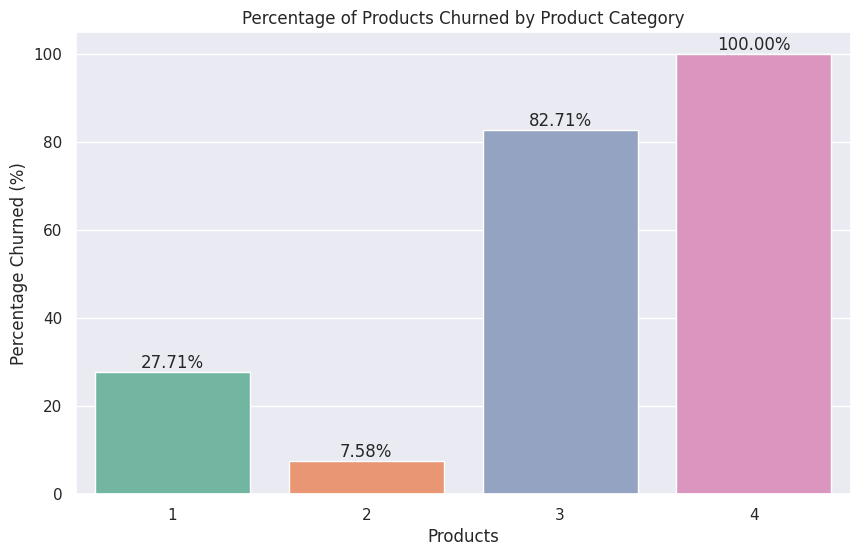

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count and percentages of products churned or not
product_counts = customer_churn['products'].value_counts()
churn_counts = customer_churn[customer_churn['churn'] == 1]['products'].value_counts()
percentage_churn = (churn_counts / product_counts) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_churn.index, y=percentage_churn.values, palette='Set2')
plt.title('Percentage of Products Churned by Product Category')
plt.xlabel('Products')
plt.ylabel('Percentage Churned (%)')

# Add percentage labels on top of the bars
for index, value in enumerate(percentage_churn):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


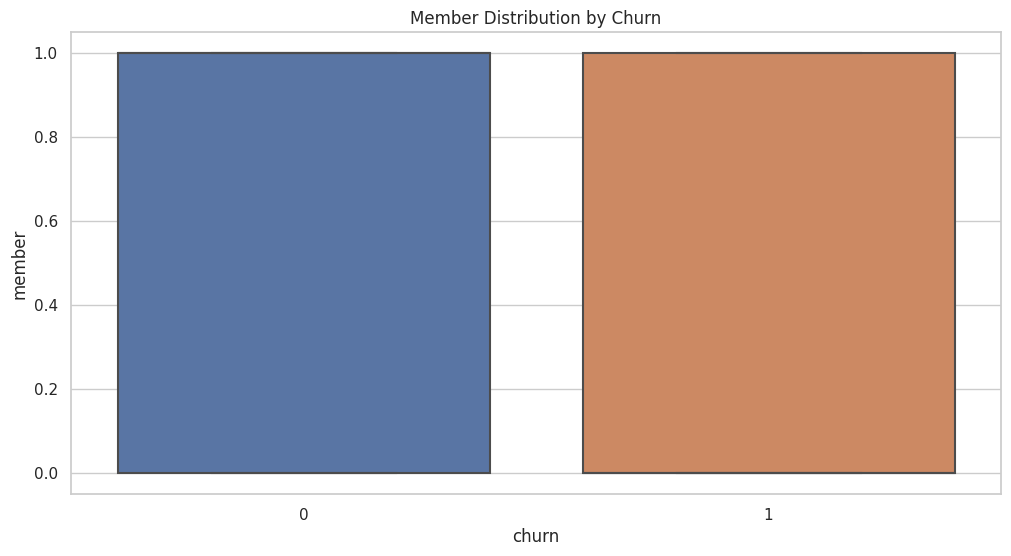

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_churn, x="churn", y="member")
plt.title("Member Distribution by Churn")
plt.show()


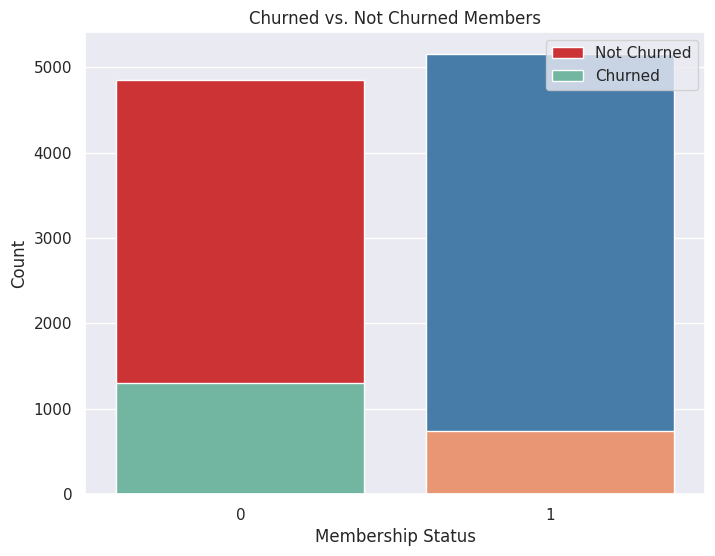

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn' with a 'Member' column indicating membership status.
# You can replace 'customer_churn' with your actual DataFrame.

# Calculate the count of members who churned and did not churn
member_counts = customer_churn['member'].value_counts()
churned_counts = customer_churn[customer_churn['churn'] == 1]['member'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=member_counts.index, y=member_counts.values, palette='Set1', label='Not Churned')
sns.barplot(x=churned_counts.index, y=churned_counts.values, palette='Set2', label='Churned')

plt.title('Churned vs. Not Churned Members')
plt.xlabel('Membership Status')
plt.ylabel('Count')

# Add a legend to distinguish between churned and not churned
plt.legend()

plt.show()


Customers having membership will churn less than without membership.

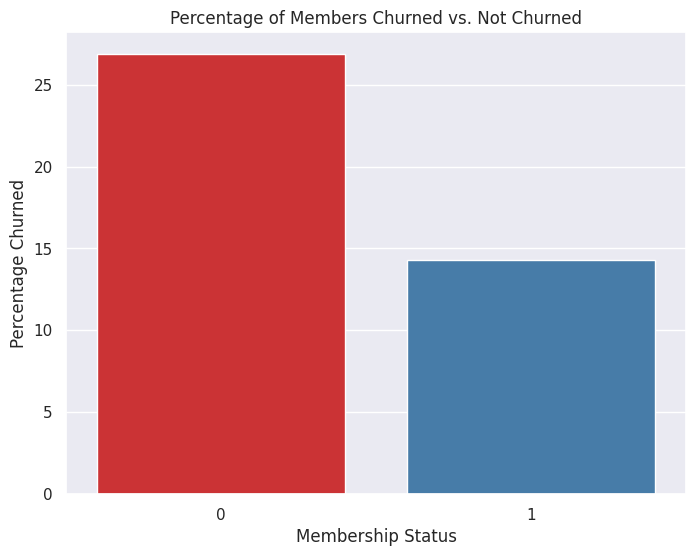

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn' with a 'Member' column indicating membership status.
# You can replace 'customer_churn' with your actual DataFrame.

# Calculate the count of members who churned and did not churn
member_counts = customer_churn['member'].value_counts()
churned_counts = customer_churn[customer_churn['churn'] == 1]['member'].value_counts()

# Calculate the percentage of members churned
churned_percentage = (churned_counts / member_counts) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=churned_percentage.index, y=churned_percentage.values, palette='Set1')
plt.title('Percentage of Members Churned vs. Not Churned')
plt.xlabel('Membership Status')
plt.ylabel('Percentage Churned')

plt.show()


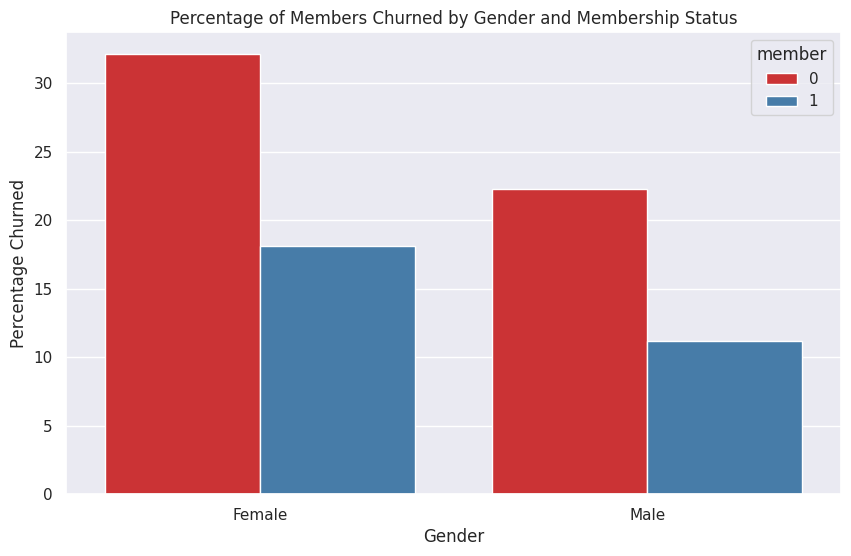

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'customer_churn' with 'Gender', 'Member', and 'Churn' columns.
# You can replace 'customer_churn' with your actual DataFrame.

# Calculate the percentage of members churned for each combination of gender and membership status
churned_percentage = customer_churn.groupby(['Gender', 'member'])['churn'].mean() * 100

# Reset the index to make it easier to create the bar plot
churned_percentage = churned_percentage.reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='churn', hue='member', data=churned_percentage, palette='Set1')
plt.title('Percentage of Members Churned by Gender and Membership Status')
plt.xlabel('Gender')
plt.ylabel('Percentage Churned')

plt.show()


Female customers who ha not having a membership will churn more.It comes approximately 35%.

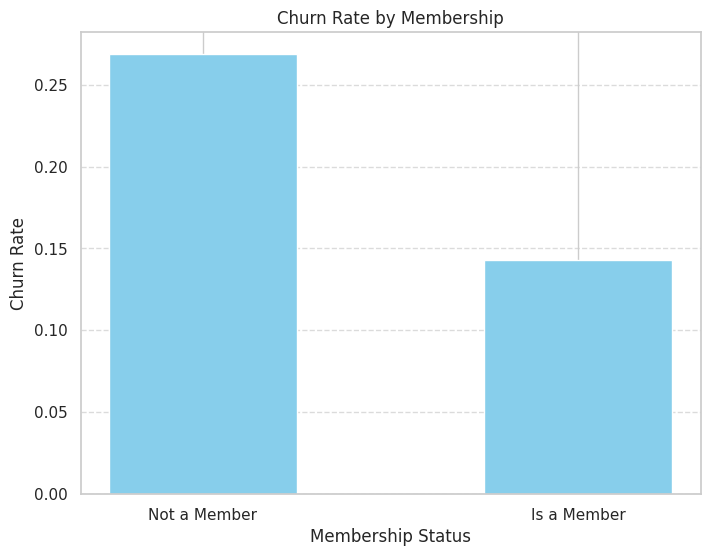

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named customer_churn with 'Churn' and 'Member' columns.

# Create bar charts to show churn by the "Member" variable
plt.figure(figsize=(8, 6))

# Group the data by 'Member' and calculate the churn rate (mean of Churn column)
churn_by_member = customer_churn.groupby('member')['churn'].mean()

# Map 0 and 1 to more descriptive labels
churn_by_member.index = ['Not a Member', 'Is a Member']

# Plot the churn rate
plt.bar(churn_by_member.index, churn_by_member, color='skyblue', width=0.5)
plt.title('Churn Rate by Membership')
plt.xlabel('Membership Status')
plt.ylabel('Churn Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


churn rate will be more for a not a member.

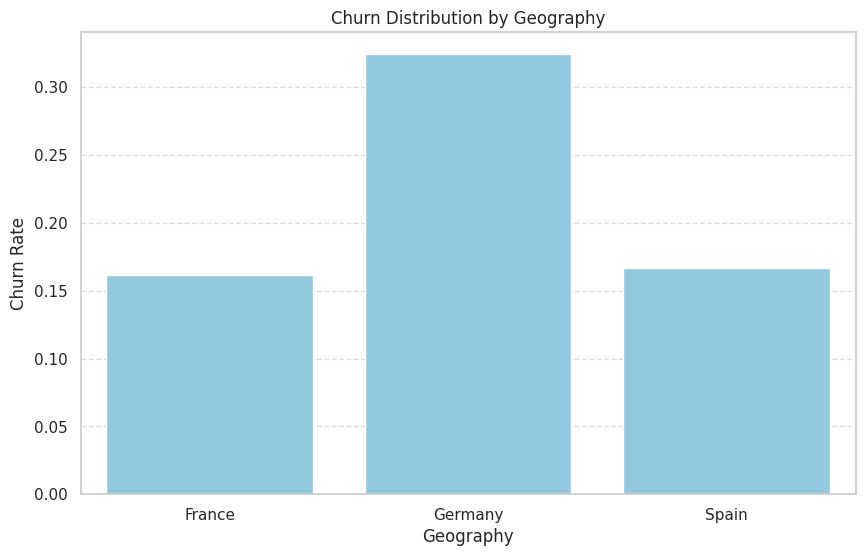

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named customer_data with 'Churn' and 'Geography' columns.

# Calculate the churn rate by geography
churn_by_geography = customer_churn.groupby('Geography')['churn'].mean().reset_index()

# Create a bar plot to show churn by geography
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_by_geography, x='Geography', y='churn', color='skyblue')
plt.title('Churn Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Churn will be more for customers in Germany.

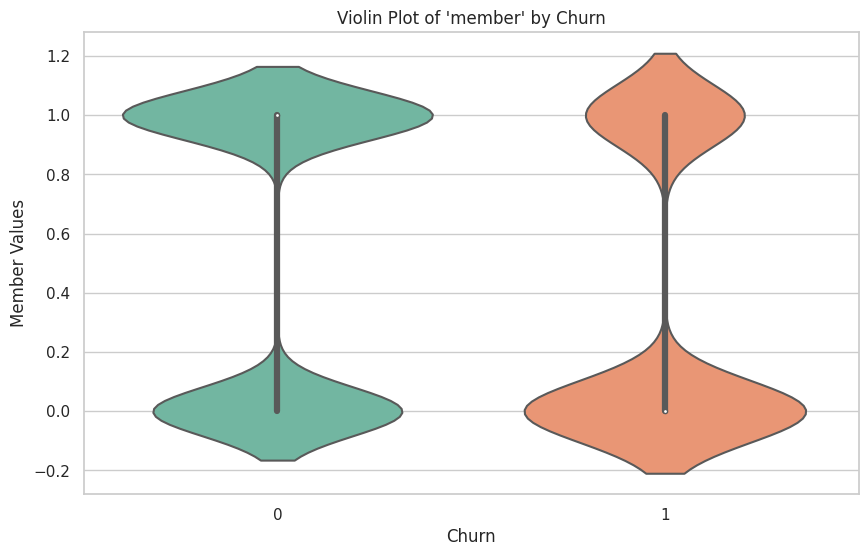

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=customer_churn, x="churn", y="member", palette="Set2")

# Set labels and title
plt.xlabel("Churn")
plt.ylabel("Member Values")
plt.title("Violin Plot of 'member' by Churn")

# Show the plot
plt.show()


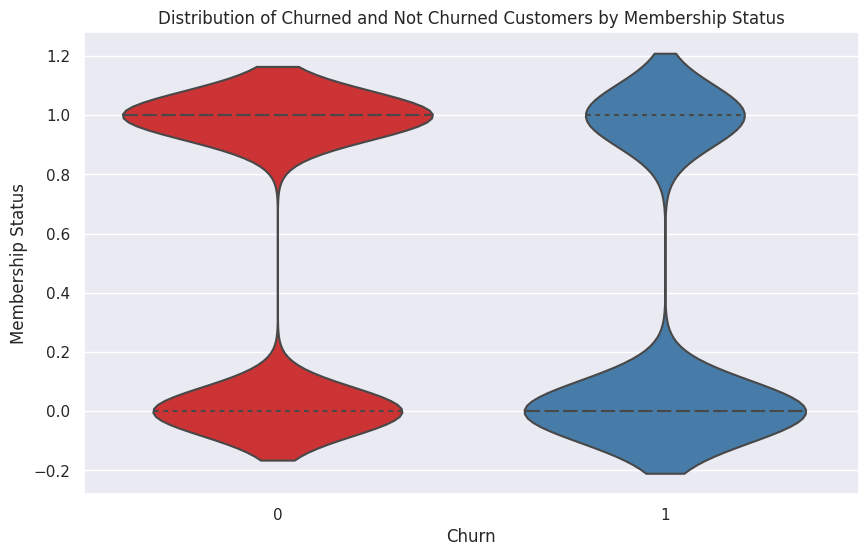

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot to visualize the distribution of churned and not churned customers based on their membership status
plt.figure(figsize=(10, 6))
sns.violinplot(x='churn', y='member', data=customer_churn, palette='Set1', inner='quart')
plt.title('Distribution of Churned and Not Churned Customers by Membership Status')
plt.xlabel('Churn')
plt.ylabel('Membership Status')

plt.show()


The violin plot consists of vertical bars (violins) on the y-axis representing the distribution of membership status (Member or Not a Member).
Each violin is divided into two parts, one for churned customers (Churn = 1) and one for not churned customers (Churn = 0).
The width of each part indicates the density of data points, and the thicker parts represent a higher density of data points.
The white dot in the middle of each violin represents the median.
The extended lines above and below the violins are called "whiskers" and show the range of data distribution.Violin plots provide a visual representation of the distribution of churned and not churned customers with respect to their membership status.
You can observe how the distribution of churned and not churned customers differs based on membership status.
The plot helps identify any differences or patterns in the churn behavior of members and non-members.
For example, if the violins for churned customers are wider or shifted in a particular direction, it indicates a difference in the churn behavior of members compared to non-members.

Pair Plot:

---



If you have a small number of numerical features, you can create a pair plot to visualize relationships between them:

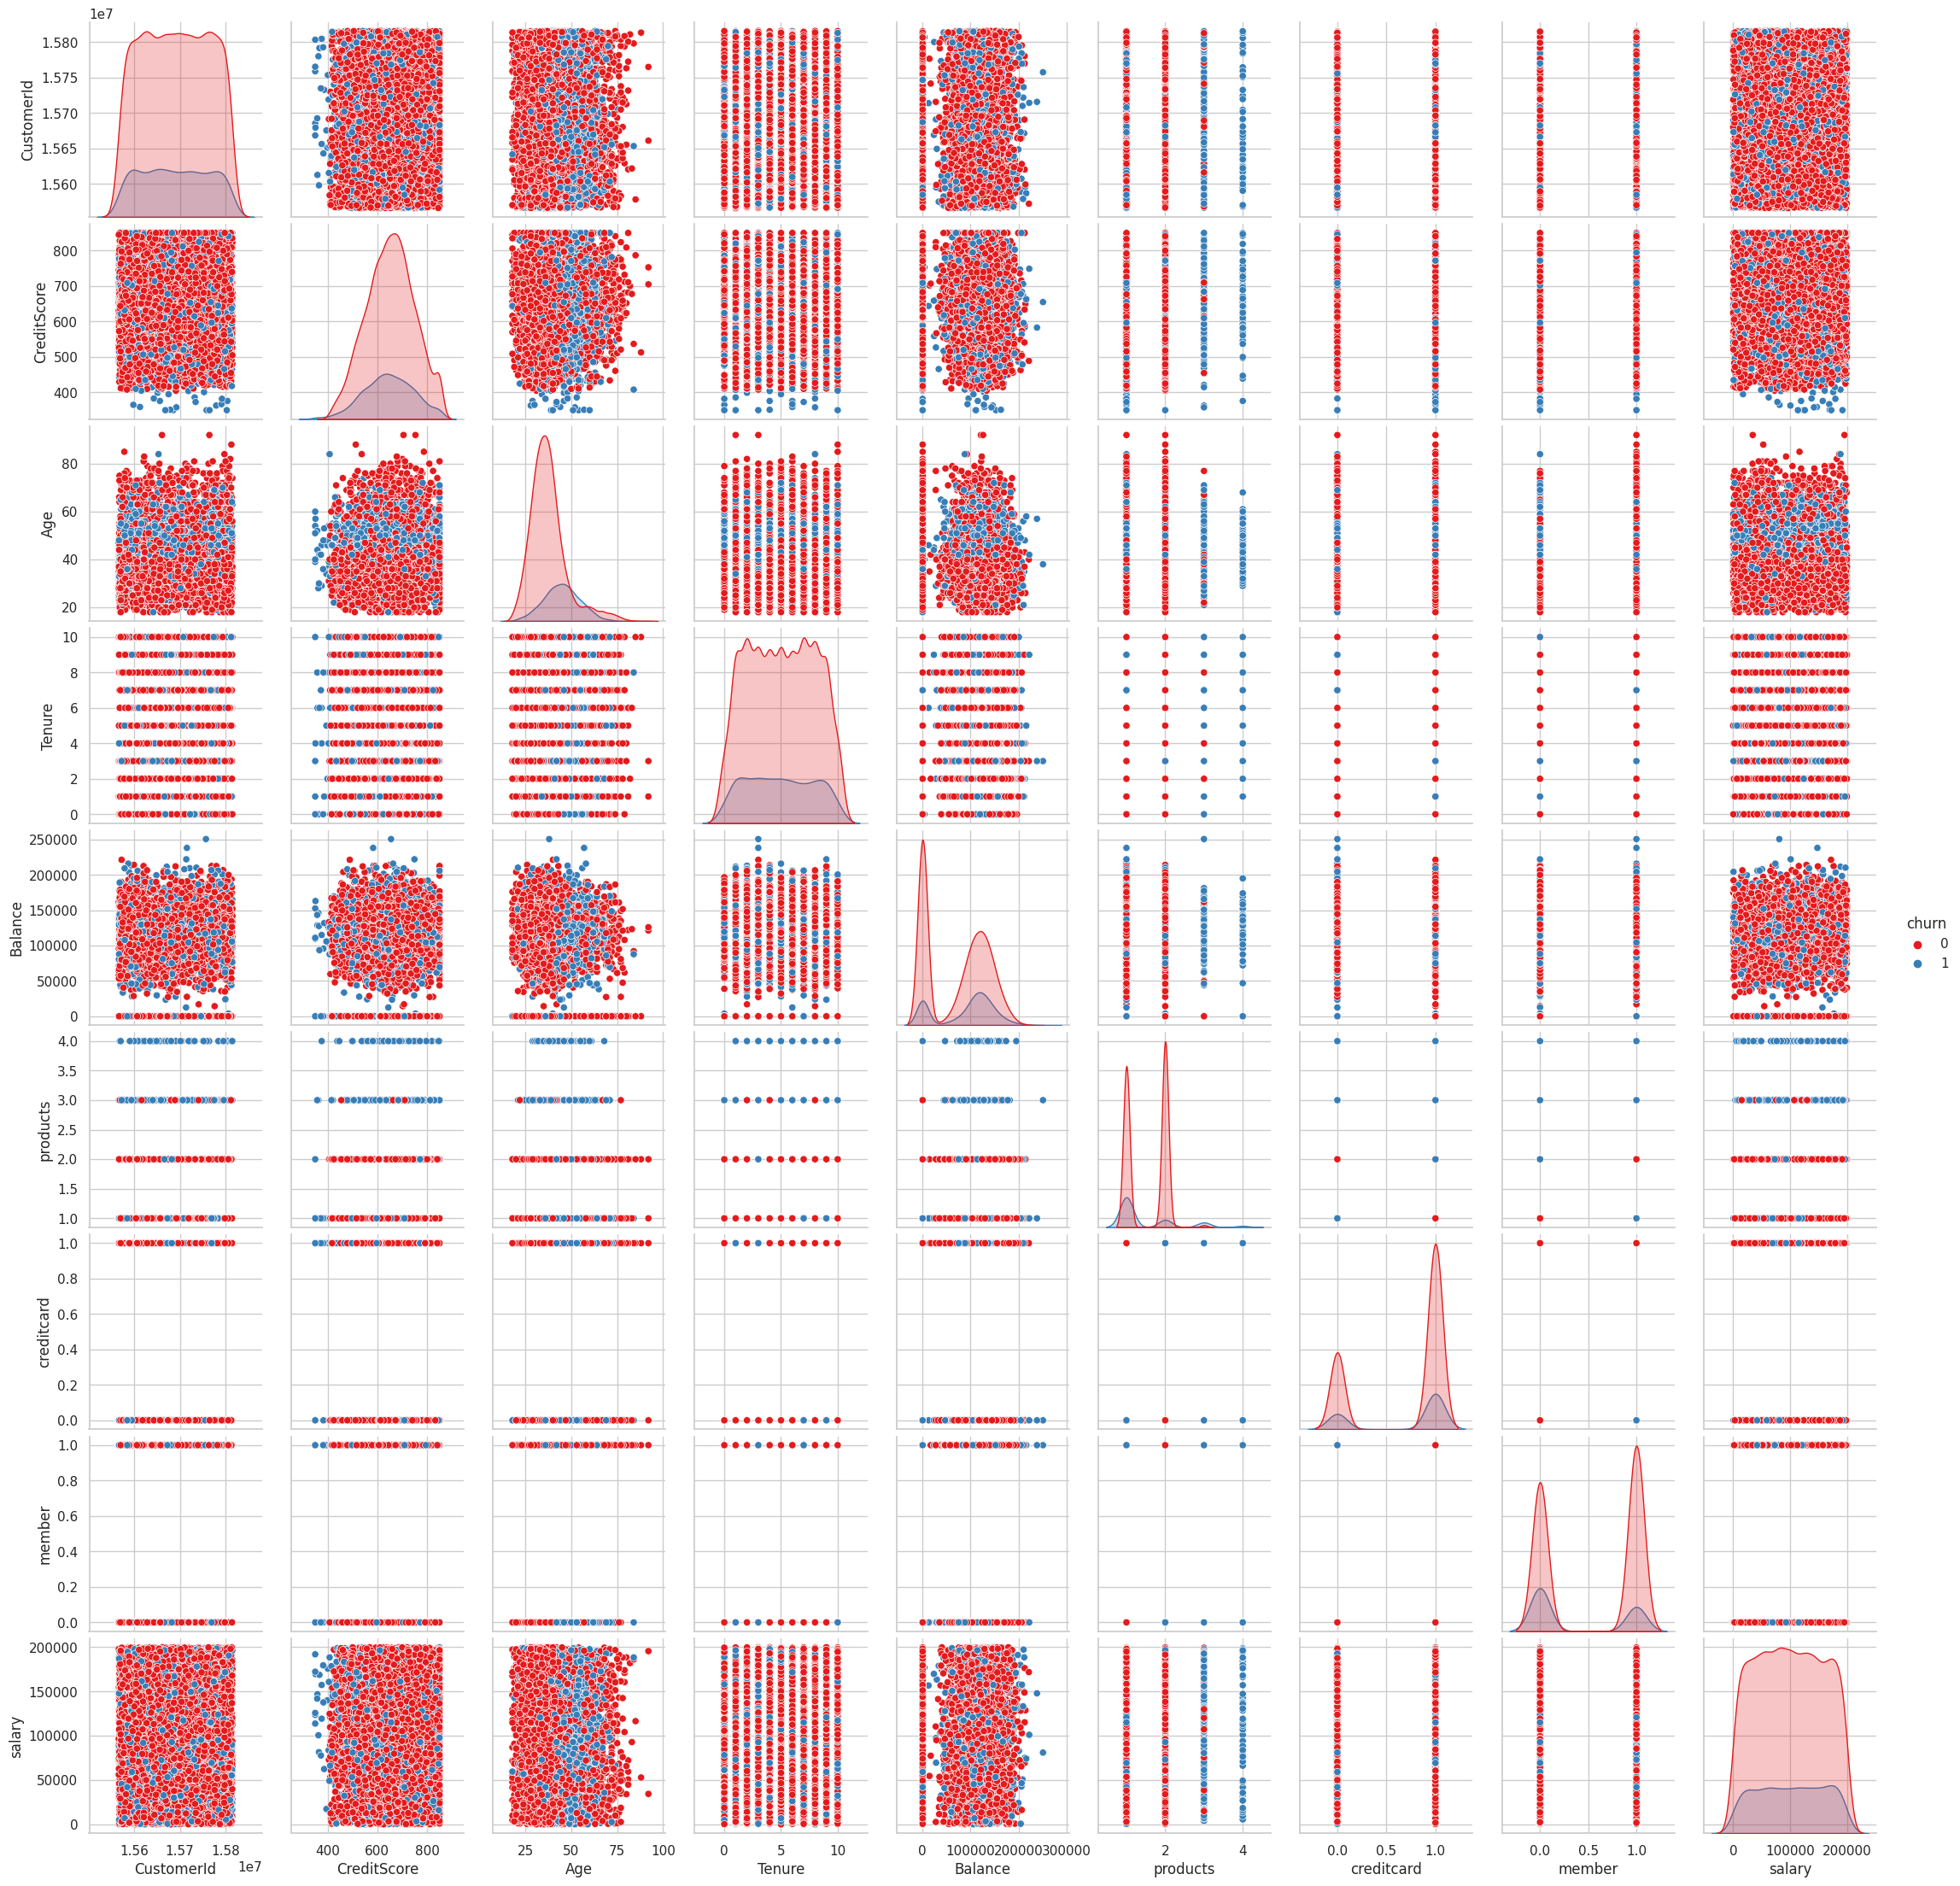

In [ ]:
sns.pairplot(customer_churn, hue="churn", palette="Set1")
plt.show()


In [65]:
customer_churn.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'products', 'creditcard', 'member', 'salary',
       'churn'],
      dtype='object')

In [66]:
customer_churn.dtypes

CustomerId       int64
Surname         object
CreditScore      int64
Geography       object
Gender          object
Age              int64
Tenure           int64
Balance        float64
products         int64
creditcard       int64
member           int64
salary         float64
churn            int64
dtype: object

In [67]:
categorical_features = customer_churn[['Surname', 'Geography','Gender']]

In [ ]:
for feature in categorical_features:
 print(feature,":")
 print(customer_churn[feature].value_counts())
 print("------------------")

Surname :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
------------------
Geography :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------
Gender :
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------


In [ ]:
numerical_features = customer_churn[['CustomerId','CreditScore','Age','Tenure','Balance','products','creditcard','member','churn']]

In [ ]:
for feature in numerical_features:
 print(feature,":")
 print(customer_churn[feature].value_counts())
 print("------------------")

CustomerId :
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
------------------
CreditScore :
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
------------------
Age :
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
------------------
Tenure :
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
------------------
Balance :
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: Balance,

******************************************************************************************************************************************************************************************************************************************************************************************************************************************


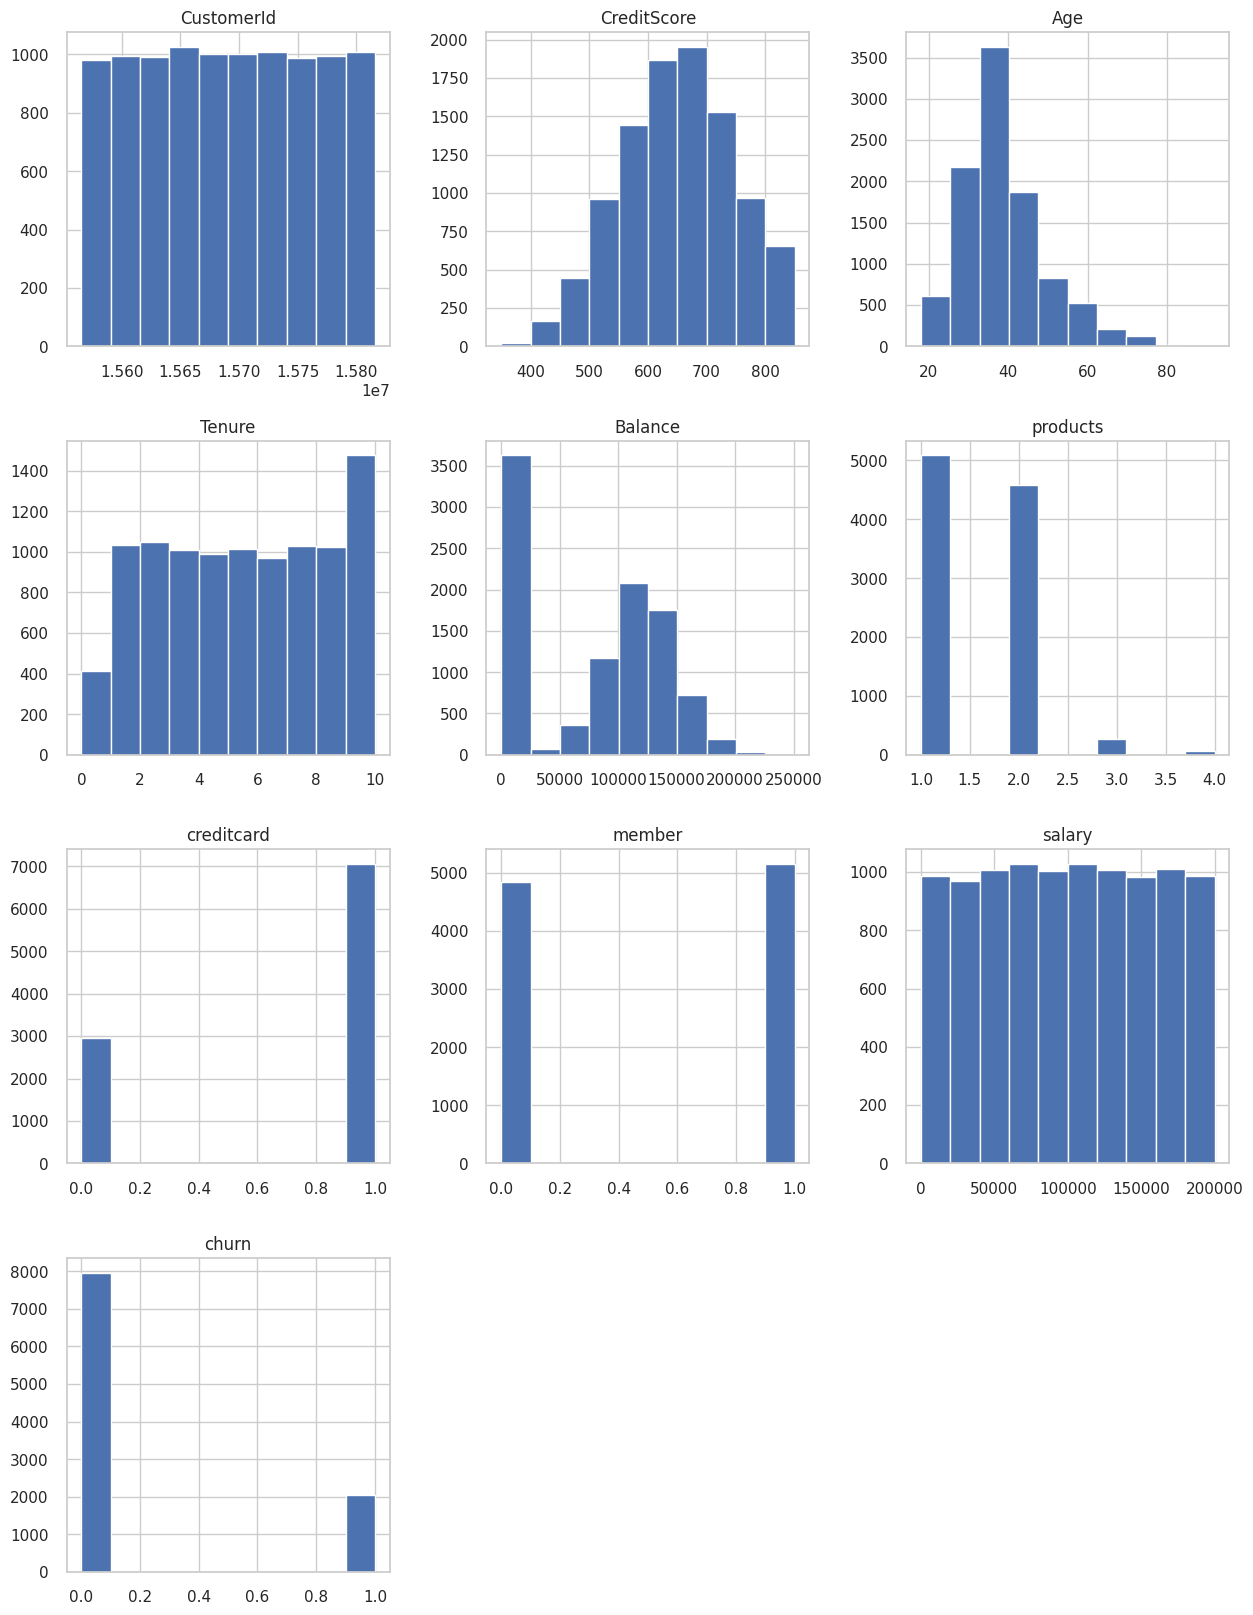

In [ ]:
#Plot of all features- Univariant Analyses
print("******************************************************************"*5)
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
customer_churn.hist(ax = ax)
plt.show()


Plot of numerical features

---



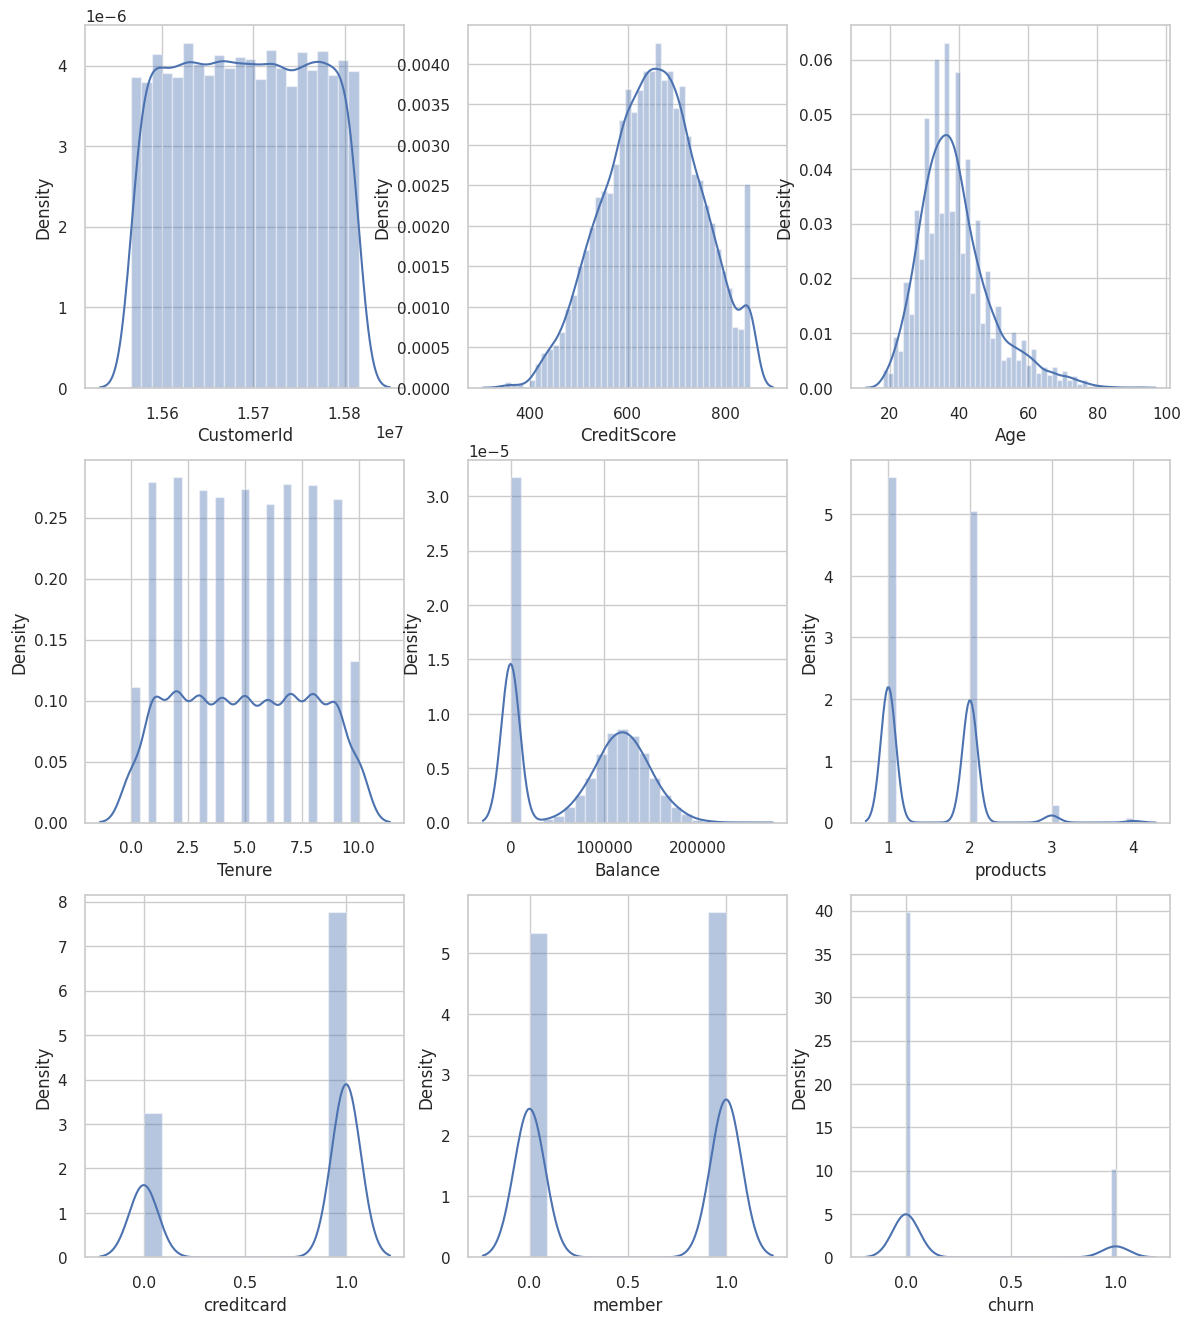

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(14,16))
index1 = 0
index2 = 0
for col in numerical_features:
 sns.distplot(customer_churn[col], ax=axes[index1][index2]);
 index2 = index2+1
 if index2==3:
  index2 = 0
  index1 = index1+1
plt.show();

One hot Encoder used to convert categorical data to same dtypes

---



In [68]:
customer_churn = pd.get_dummies(customer_churn, columns = ['Surname', 'Geography', 'Gender'], drop_first = True)

In [69]:
customer_churn.head()

CustomerId  CreditScore  Age  Tenure    Balance  products  creditcard  \
0    15634602          619   42       2       0.00         1           1   
1    15647311          608   41       1   83807.86         1           0   
2    15619304          502   42       8  159660.80         3           1   
3    15701354          699   39       1       0.00         2           0   
4    15737888          850   43       2  125510.82         1           1   

   member     salary  churn  ...  Surname_Zotova  Surname_Zox  \
0       1  101348.88      1  ...               0            0   
1       1  112542.58      0  ...               0            0   
2       0  113931.57      1  ...               0            0   
3       0   93826.63      0  ...               0            0   
4       1   79084.10      0  ...               0            0   

   Surname_Zubarev  Surname_Zubareva  Surname_Zuev  Surname_Zuyev  \
0                0                 0             0              0   
1                0                 0             0              0   
2                0                 0             0              0   
3                0                 0             0              0   
4                0                 0             0              0   

   Surname_Zuyeva  Geography_Germany  Geography_Spain  Gender_Male  
0               0                  0                0            0  
1               0                  0                1            0  
2               0                  0                0            0  
3               0                  0                0            0  
4               0                  0                1            0  

[5 rows x 2944 columns]

In [70]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 2944 entries, CustomerId to Gender_Male
dtypes: float64(2), int64(8), uint8(2934)
memory usage: 28.7 MB


In [71]:
customer_churn.dtypes

CustomerId             int64
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
                      ...   
Surname_Zuyev          uint8
Surname_Zuyeva         uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
Length: 2944, dtype: object

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = [ 'CreditScore','Age','Tenure','Balance','products', 'creditcard','salary']
customer_churn[scaler_columns] = scaler.fit_transform(customer_churn[scaler_columns])

In [ ]:
customer_churn.head()

CustomerId  CreditScore       Age    Tenure   Balance  products  \
0    15634602    -0.326221  0.293517 -1.041760 -1.225848 -0.911583   
1    15647311    -0.440036  0.198164 -1.387538  0.117350 -0.911583   
2    15619304    -1.536794  0.293517  1.032908  1.333053  2.527057   
3    15701354     0.501521  0.007457 -1.387538 -1.225848  0.807737   
4    15737888     2.063884  0.388871 -1.041760  0.785728 -0.911583   

   creditcard  member    salary  churn  ... Surname_Zotova  Surname_Zox  \
0    0.646092       1  0.021886      1  ...              0            0   
1   -1.547768       1  0.216534      0  ...              0            0   
2    0.646092       0  0.240687      1  ...              0            0   
3   -1.547768       0 -0.108918      0  ...              0            0   
4    0.646092       1 -0.365276      0  ...              0            0   

   Surname_Zubarev  Surname_Zubareva  Surname_Zuev  Surname_Zuyev  \
0                0                 0             0              0   
1                0                 0             0              0   
2                0                 0             0              0   
3                0                 0             0              0   
4                0                 0             0              0   

   Surname_Zuyeva  Geography_Germany  Geography_Spain  Gender_Male  
0               0                  0                0            0  
1               0                  0                1            0  
2               0                  0                0            0  
3               0                  0                0            0  
4               0                  0                1            0  

[5 rows x 2945 columns]

Split the data into dependent and independent variables

---



In [73]:
x = customer_churn.drop(['CustomerId','churn'], axis=1)
y= customer_churn['churn']

In [74]:
x.head()

CreditScore       Age    Tenure   Balance  products  creditcard  member  \
0    -0.326221  0.293517 -1.041760 -1.225848 -0.911583    0.646092       1   
1    -0.440036  0.198164 -1.387538  0.117350 -0.911583   -1.547768       1   
2    -1.536794  0.293517  1.032908  1.333053  2.527057    0.646092       0   
3     0.501521  0.007457 -1.387538 -1.225848  0.807737   -1.547768       0   
4     2.063884  0.388871 -1.041760  0.785728 -0.911583    0.646092       1   

     salary  Surname_Abbie  Surname_Abbott  ...  Surname_Zotova  Surname_Zox  \
0  0.021886              0               0  ...               0            0   
1  0.216534              0               0  ...               0            0   
2  0.240687              0               0  ...               0            0   
3 -0.108918              0               0  ...               0            0   
4 -0.365276              0               0  ...               0            0   

   Surname_Zubarev  Surname_Zubareva  Surname_Zuev  Surname_Zuyev  \
0                0                 0             0              0   
1                0                 0             0              0   
2                0                 0             0              0   
3                0                 0             0              0   
4                0                 0             0              0   

   Surname_Zuyeva  Geography_Germany  Geography_Spain  Gender_Male  
0               0                  0                0            0  
1               0                  0                1            0  
2               0                  0                0            0  
3               0                  0                0            0  
4               0                  0                1            0  

[5 rows x 2942 columns]

In [75]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [76]:
x.shape

(10000, 2942)

In [77]:
y.shape

(10000,)

In [78]:
print(x.shape)

(10000, 2942)


In [79]:
print(y.shape)

(10000,)


In [80]:
x.isna().any()

CreditScore          False
Age                  False
Tenure               False
Balance              False
products             False
                     ...  
Surname_Zuyev        False
Surname_Zuyeva       False
Geography_Germany    False
Geography_Spain      False
Gender_Male          False
Length: 2942, dtype: bool

In [81]:
y.isna().any()

False

Handling Imbalances of data since target is minority by using SMOTE technique

---



In [82]:
import imblearn

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(x_smote.shape)
print("\n")
print(y_smote.shape)
print('\n')
print(y_smote.value_counts())
print('\n')
print(y.value_counts())

(15926, 2942)


(15926,)


1    7963
0    7963
Name: churn, dtype: int64


0    7963
1    2037
Name: churn, dtype: int64


In [84]:
x_smote.shape

(15926, 2942)

In [85]:
y_smote.shape

(15926,)

Splitting the data into training and test for building the model and predicting with test data

---



In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [87]:
x_train, x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 101)

Decision Tree Classifier

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train , y_train)

DecisionTreeClassifier()

Prediction

---



In [ ]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

confusion_matrix

---



In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test))

confusion_matrix:
 [[1291  294]
 [ 227 1374]]


classification_Report

---



In [ ]:
print("classification_report:\n", classification_report(y_test, y_pred_test))

classification_report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1585
           1       0.82      0.86      0.84      1601

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



Accuracy_Score

---



In [ ]:
print("Training Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_train, y_pred_train)*100))
print("***************"*10)
print("Test Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_test, y_pred_test)*100))

Training Accuracy of DecisionTree is 100.00%
******************************************************************************************************************************************************
Test Accuracy of DecisionTree is 83.65%


Random Forest Model - to handle overfitting (high variance problem)

---



In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier(n_estimators =1000, criterion = 'entropy', oob_score = True)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True)

Predictions

---



In [92]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

Confusion_matrix

---



In [93]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_rf))

confusion_matrix:
 [[1217  368]
 [  90 1511]]


Classification_Report

---



In [94]:
print("classification_report:\n", classification_report(y_test, y_pred_test_rf))

classification_report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84      1585
           1       0.80      0.94      0.87      1601

    accuracy                           0.86      3186
   macro avg       0.87      0.86      0.86      3186
weighted avg       0.87      0.86      0.86      3186



Accuracy_score

---



In [95]:
print("Training Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_train, y_pred_train_rf)*100))
print("***************"*10)
print("Test Accuracy of DecisionTree is {:.2f}%".format(accuracy_score(y_test, y_pred_test_rf)*100))

Training Accuracy of DecisionTree is 100.00%
******************************************************************************************************************************************************
Test Accuracy of DecisionTree is 85.62%


In [96]:
y_test

2584     0
9766     0
11015    1
14196    1
1398     1
        ..
11247    1
9503     0
13702    1
5452     1
10942    1
Name: churn, Length: 3186, dtype: int64

In [97]:
actual_data = pd.concat([y_test , pd.DataFrame(y_pred_test_rf)], axis =1)

In [98]:
actual_data[0].value_counts()

1.0    1879
0.0    1307
Name: 0, dtype: int64

In [99]:
1879+1307

3186

In [100]:
actual_data.to_csv("validation1.csv")

In [101]:
actual_data

churn    0
2584     0.0  1.0
9766     0.0  NaN
11015    1.0  NaN
14196    1.0  NaN
1398     1.0  0.0
...      ...  ...
3180     NaN  1.0
3181     NaN  1.0
3182     NaN  1.0
3184     NaN  1.0
3185     NaN  1.0

[5729 rows x 2 columns]

In [102]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_train_rf)*100))
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_test_rf)*100))

Training Accuracy of RandomForest is 100.00%
******************************************************************************************************************************************************
Test Accuracy of RandomForest is 85.62%


Cross_Validation is required

---



In [103]:
# Split your full dataset into a smaller subset for cross-validation
from sklearn.model_selection import cross_val_score
x_train_subset,x_test_subset, y_train_subset,y_test_subset = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


In [104]:
from sklearn.model_selection import cross_val_score
train_accuracy = cross_val_score(rf, x_train_subset, y_train_subset ,cv=5, n_jobs =-1)
test_accuracy = cross_val_score(rf, x_test_subset , y_test_subset, cv=5, n_jobs =-1)
print(train_accuracy)
print("***************"*5)
print(train_accuracy.mean())
print("***************"*5)
print(test_accuracy)
print("***************"*5)
print(test_accuracy.mean())

[0.84873583 0.8634976  0.86131705 0.85303096 0.84300044]
***************************************************************************
0.8539163771624416
***************************************************************************
[0.8        0.81176471 0.78823529 0.78823529 0.74409449]
***************************************************************************
0.7864659564613247


Using RandomForest with criterion Gini

---



In [ ]:
rf1 = RandomForestClassifier(n_estimators=500,criterion='gini',oob_score=False)
rf1.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

Predictions with Gini

---



In [ ]:
y_pred_train_rf1 = rf1.predict(x_train)
y_pred_test_rf1 = rf1.predict(x_test)

confusion_matrix

---



In [ ]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_rf1))

confusion_matrix:
 [[1238  347]
 [  86 1515]]


Classification_Report with gini

---



In [ ]:
print("Classification report with gini:\n", classification_report(y_test, y_pred_test_rf1))

Classification report with gini:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      1585
           1       0.81      0.95      0.87      1601

    accuracy                           0.86      3186
   macro avg       0.87      0.86      0.86      3186
weighted avg       0.87      0.86      0.86      3186



Accuracy_score with gini

---



In [ ]:
print("Training Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_train, y_pred_train_rf1)*100))
print("***************"*10)
print("Test Accuracy of RandomForest is {:.2f}%".format(accuracy_score(y_test, y_pred_test_rf1)*100))

Training Accuracy of RandomForest is 100.00%
******************************************************************************************************************************************************
Test Accuracy of RandomForest is 86.41%


Pycaret model -Classification

---



In [ ]:
#!pip install git+https://github.com/pycaret/pycaret.git#egg=pycaret

  Cloning https://github.com/pycaret/pycaret.git to /tmp/pip-install-874wj2ph/pycaret_fb51b078fcc340388e6d8c093a9b2a4b
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-install-874wj2ph/pycaret_fb51b078fcc340388e6d8c093a9b2a4b
  Resolved https://github.com/pycaret/pycaret.git to commit 62a3895098ad3ac4eb6da1da385fcc3c708a5843
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73

In [ ]:
!pip install pycaret

In [ ]:
import pycaret.utils

In [ ]:
!pip install packaging==21.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 812.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
statsmodels 0.14.0 requires packaging>=21.3, but you have packaging 21.2 which is incompatible.
xarray 2023.7.0 requires packaging>=21.3, but you have packaging 21.2 w

In [ ]:
from pycaret.classification import *

In [ ]:
exp_clf = setup(data=customer_churn, target='churn', session_id=123)

In [ ]:
compare_models(probability_threshold = 0.25)

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                                                               min_child_weight=0.001,
                                                               min_split_gain=0.0,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_leaves=31,
                                                               objective=None,
                                                               random_state=1...
                                                               subsample_for_bin=200000,
                                                               subsample_freq=0),
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, probability_threshold=0.25,
                                     random_state=123, reg_alpha=0.0,
                                     reg_lambda=0.0, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0)

In [ ]:
compare_models(budget_time = 0.5)

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Gradient boost classifier is shown as the best model by pycaret. so i am creating a model with it and  fine tuning  it.

In [ ]:
gradb= create_model('gbc')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Model Tuning

---



In [ ]:
tuned_gradb = tune_model(gradb, early_stopping = True, optimize = 'Accuracy',fold =3)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


The original model is better than tuned model so i am evaluating that one.

In [ ]:
!pip install explainerdashboard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 9.7 MB/s eta 0:00:00


In [ ]:
import IPython
print(IPython.__version__)


7.34.0


In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data = customer_churn, target = 'churn', session_id = 123)

In [ ]:
# functional API
#best = compare_models()

# OOP API
best = s.compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# functional API
#predict_model(best)

# OOP API
s.predict_model(best)

CustomerId  CreditScore       Age    Tenure   Balance  products  \
3564    15803121     2.032843  1.151700 -0.004426  0.337849 -0.911583   
1986    15772601     2.012150  0.198164 -1.041760  0.084108  0.807737   
3684    15714006    -1.743730 -0.373958 -1.041760  0.907548 -0.911583   
3334    15702300     0.211811 -1.136786 -0.004426 -1.225848  0.807737   
8346    15793324     0.460134 -0.660019  1.378686 -1.225848  2.527057   
...          ...          ...       ...       ...       ...       ...   
9164    15767488     0.304932 -0.278604  0.687130 -1.225848  0.807737   
364     15676715    -0.108939  2.772711  1.378686 -1.225848  0.807737   
3872    15620123    -0.471076  0.007457  0.341352  0.555885 -0.911583   
3311    15608226    -1.422980  3.154125 -0.695982  0.359282 -0.911583   
5713    15643439    -1.174657  0.770285  1.724464 -1.225848  0.807737   

      creditcard  member    salary  Surname_Abbie  ...  Surname_Zubareva  \
3564   -1.547768       0  0.766747              0  ...                 0   
1986   -1.547768       0  1.733180              0  ...                 0   
3684   -1.547768       1 -0.350080              0  ...                 0   
3334   -1.547768       0  0.361740              0  ...                 0   
8346   -1.547768       1 -1.070405              0  ...                 0   
...          ...     ...       ...            ...  ...               ...   
9164    0.646092       0 -1.390790              0  ...                 0   
364     0.646092       1  1.728521              0  ...                 0   
3872   -1.547768       0 -1.572815              0  ...                 0   
3311    0.646092       1 -0.327591              0  ...                 0   
5713   -1.547768       1 -1.297352              0  ...                 0   

      Surname_Zuev  Surname_Zuyev  Surname_Zuyeva  Geography_Germany  \
3564             0              0               0                  0   
1986             0              0               0                  1   
3684             0              0               0                  0   
3334             0              0               0                  0   
8346             0              0               0                  0   
...            ...            ...             ...                ...   
9164             0              0               0                  0   
364              0              0               0                  0   
3872             0              0               0                  0   
3311             0              0               0                  0   
5713             0              0               0                  0   

      Geography_Spain  Gender_Male  churn  prediction_label  prediction_score  
3564                0            1      1                 1            0.6674  
1986                0            0      0                 0            0.9097  
3684                0            0      0                 0            0.8913  
3334                0            1      0                 0            0.9729  
8346                1            1      0                 0            0.7240  
...               ...          ...    ...               ...               ...  
9164                1            1      0                 0            0.9647  
364                 0            1      0                 0            0.9506  
3872                0            1      0                 0            0.8184  
3311                1            1      0                 0            0.9243  
5713                0            1      0                 0            0.8992  

[3000 rows x 2946 columns]

In [ ]:
# functional API
#predictions = predict_model(best, data=customer_churn)
#predictions.head()

# OOP API
predictions = s.predict_model(best, data=customer_churn, raw_score= True)
predictions.head()

CustomerId  CreditScore       Age    Tenure   Balance  products  \
0    15634602    -0.326221  0.293517 -1.041760 -1.225848 -0.911583   
1    15647311    -0.440036  0.198164 -1.387538  0.117350 -0.911583   
2    15619304    -1.536794  0.293517  1.032908  1.333053  2.527057   
3    15701354     0.501521  0.007457 -1.387538 -1.225848  0.807737   
4    15737888     2.063884  0.388871 -1.041760  0.785728 -0.911583   

   creditcard  member    salary  Surname_Abbie  ...  Surname_Zuev  \
0    0.646092       1  0.021886              0  ...             0   
1   -1.547768       1  0.216534              0  ...             0   
2    0.646092       0  0.240687              0  ...             0   
3   -1.547768       0 -0.108918              0  ...             0   
4    0.646092       1 -0.365276              0  ...             0   

   Surname_Zuyev  Surname_Zuyeva  Geography_Germany  Geography_Spain  \
0              0               0                  0                0   
1              0               0                  0                1   
2              0               0                  0                0   
3              0               0                  0                0   
4              0               0                  0                1   

   Gender_Male  churn  prediction_label  prediction_score_0  \
0            0      1                 0              0.6933   
1            0      0                 0              0.8052   
2            0      1                 1              0.0721   
3            0      0                 0              0.9384   
4            0      0                 0              0.7528   

   prediction_score_1  
0              0.3067  
1              0.1948  
2              0.9279  
3              0.0616  
4              0.2472  

[5 rows x 2947 columns]

In [ ]:
# functional API
#save_model(best, 'my_best_pipeline')

# OOP API
s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CustomerId', 'CreditScore', 'Age',
                                              'Tenure', 'Balance', 'products',
                                              'creditcard', 'member', 'salary',
                                              'Surname_Abbie', 'Surname_Abbott',
                                              'Surname_Abdullah',
                                              'Surname_Abdulov', 'Surname_Abel',
                                              'Surname_Abernathy',
                                              'Surname_Abramov',
                                              'Surname_Abramova',
                                              'Surnam...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, 

Logistic Regression

---



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predictions with LogisticRegression

---



In [ ]:
y_pred_train_lg = log.predict(x_train)
y_pred_test_lg = log.predict(x_test)

Classification Report

---



In [ ]:
print("Classification report with LR:\n", classification_report(y_test, y_pred_test_lg))

Classification report with LR:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78      1585
           1       0.77      0.82      0.79      1601

    accuracy                           0.78      3186
   macro avg       0.79      0.78      0.78      3186
weighted avg       0.79      0.78      0.78      3186



Accuracy_score

---



In [ ]:
print("Training Accuracy of Logit is {:.2f}%".format(accuracy_score(y_train, y_pred_train_lg)*100))
print("***************"*10)
print("Test Accuracy of Logit is {:.2f}%".format(accuracy_score(y_test, y_pred_test_lg)*100))

Training Accuracy of Logit is 82.47%
******************************************************************************************************************************************************
Test Accuracy of Logit is 78.50%


Going to predict the probability of churn or not with respect to CustomerId

---



In [ ]:
customer_churn['CustomerId'].value_counts()

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

To find the probability of customers with customerid that will not churn

---



In [ ]:
customer_churn['probability'] = log.predict_proba(customer_churn[x_test.columns])[:,0]

In [ ]:
customer_churn[['CustomerId','probability']].tail(20)

CustomerId  probability
9980    15719276     0.824831
9981    15672754     0.351366
9982    15768163     0.134884
9983    15656710     0.587175
9984    15696175     0.773171
9985    15586914     0.612118
9986    15581736     0.556076
9987    15588839     0.925359
9988    15589329     0.885101
9989    15605622     0.985319
9990    15798964     0.676501
9991    15769959     0.171570
9992    15657105     0.806911
9993    15569266     0.648108
9994    15719294     0.827511
9995    15606229     0.661095
9996    15569892     0.942785
9997    15584532     0.891450
9998    15682355     0.454950
9999    15628319     0.824616

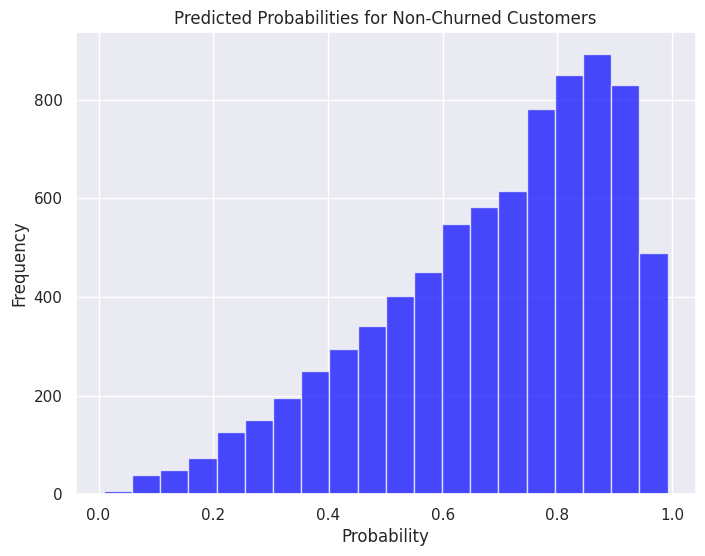

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for customers who won't churn (Churn = 0)
non_churn_data = customer_churn[customer_churn['churn'] == 0]

# Plot a histogram of the predicted probabilities for non-churned customers
plt.figure(figsize=(8, 6))
plt.hist(non_churn_data['probability'], bins=20, color='blue', alpha=0.7)
plt.title("Predicted Probabilities for Non-Churned Customers")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


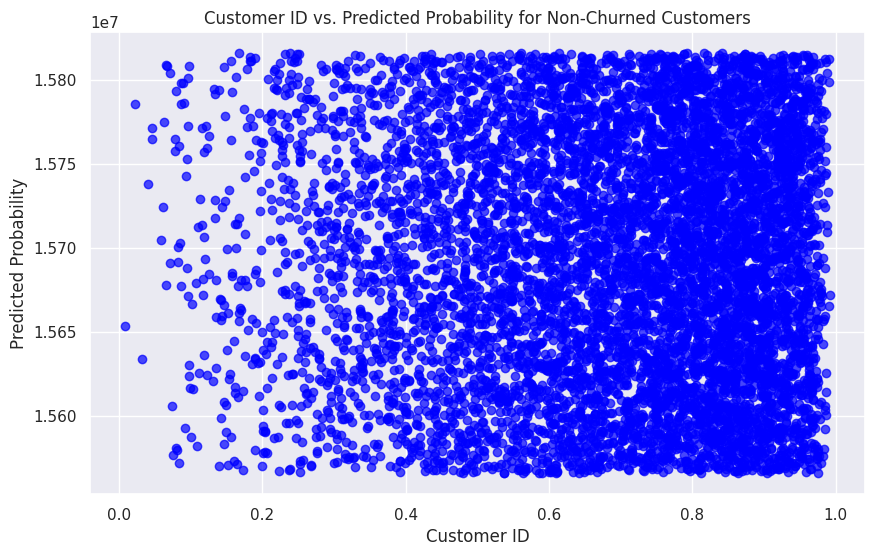

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for customers who won't churn (Churn = 0)
non_churn_data = customer_churn[customer_churn['churn'] == 0]

# Create a scatter plot of customer ID vs. predicted probability
plt.figure(figsize=(10, 6))
plt.scatter(non_churn_data['probability'], non_churn_data['CustomerId'], color='blue', alpha=0.7)
plt.title("Customer ID vs. Predicted Probability for Non-Churned Customers")
plt.xlabel("Customer ID")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()


In [ ]:
customer_churn

CustomerId  CreditScore       Age    Tenure   Balance  products  \
0       15634602    -0.326221  0.293517 -1.041760 -1.225848 -0.911583   
1       15647311    -0.440036  0.198164 -1.387538  0.117350 -0.911583   
2       15619304    -1.536794  0.293517  1.032908  1.333053  2.527057   
3       15701354     0.501521  0.007457 -1.387538 -1.225848  0.807737   
4       15737888     2.063884  0.388871 -1.041760  0.785728 -0.911583   
...          ...          ...       ...       ...       ...       ...   
9995    15606229     1.246488  0.007457 -0.004426 -1.225848  0.807737   
9996    15569892    -1.391939 -0.373958  1.724464 -0.306379 -0.911583   
9997    15584532     0.604988 -0.278604  0.687130 -1.225848 -0.911583   
9998    15682355     1.256835  0.293517 -0.695982 -0.022608  0.807737   
9999    15628319     1.463771 -1.041433 -0.350204  0.859965 -0.911583   

      creditcard  member    salary  churn  ...  Surname_Zox  Surname_Zubarev  \
0       0.646092       1  0.021886      1  ...            0                0   
1      -1.547768       1  0.216534      0  ...            0                0   
2       0.646092       0  0.240687      1  ...            0                0   
3      -1.547768       0 -0.108918      0  ...            0                0   
4       0.646092       1 -0.365276      0  ...            0                0   
...          ...     ...       ...    ...  ...          ...              ...   
9995    0.646092       0 -0.066419      0  ...            0                0   
9996    0.646092       1  0.027988      0  ...            0                0   
9997   -1.547768       1 -1.008643      1  ...            0                0   
9998    0.646092       0 -0.125231      1  ...            0                0   
9999    0.646092       0 -1.076370      0  ...            0                0   

      Surname_Zubareva  Surname_Zuev  Surname_Zuyev  Surname_Zuyeva  \
0                    0             0              0               0   
1                    0             0              0               0   
2                    0             0              0               0   
3                    0             0              0               0   
4                    0             0              0               0   
...                ...           ...            ...             ...   
9995                 0             0              0               0   
9996                 0             0              0               0   
9997                 0             0              0               0   
9998                 0             0              0               0   
9999                 0             0              0               0   

      Geography_Germany  Geography_Spain  Gender_Male  probability  
0                     0                0            0     0.387822  
1                     0                1            0     0.859570  
2                     0                0            0     0.230878  
3                     0                0            0     0.667053  
4                     0                1            0     0.904956  
...                 ...              ...          ...          ...  
9995                  0                0            1     0.661095  
9996                  0                0            1     0.942785  
9997                  0                0            0     0.891450  
9998                  1                0            1     0.454950  
9999                  0                0            0     0.824616  

[10000 rows x 2945 columns]

To find the probability of customers with customerid that will churn

---



In [ ]:
customer_churn['probability'] = log.predict_proba(customer_churn[x_test.columns])[:,1]

In [ ]:
customer_churn[['CustomerId','probability']].tail(20)

CustomerId  probability
9980    15719276     0.175169
9981    15672754     0.648634
9982    15768163     0.865116
9983    15656710     0.412825
9984    15696175     0.226829
9985    15586914     0.387882
9986    15581736     0.443924
9987    15588839     0.074641
9988    15589329     0.114899
9989    15605622     0.014681
9990    15798964     0.323499
9991    15769959     0.828430
9992    15657105     0.193089
9993    15569266     0.351892
9994    15719294     0.172489
9995    15606229     0.338905
9996    15569892     0.057215
9997    15584532     0.108550
9998    15682355     0.545050
9999    15628319     0.175384

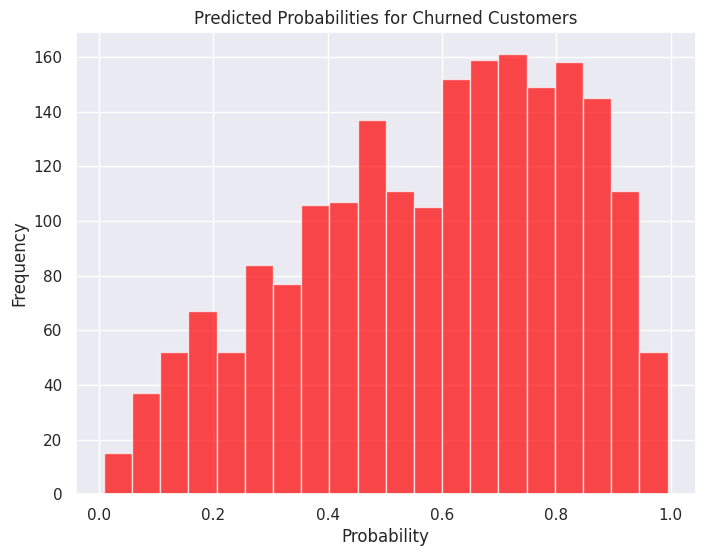

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for customers who won't churn (Churn = 1)
churn_data = customer_churn[customer_churn['churn'] == 1]

# Plot a histogram of the predicted probabilities for churned customers
plt.figure(figsize=(8, 6))
plt.hist(churn_data['probability'], bins=20, color='red', alpha=0.7)
plt.title("Predicted Probabilities for Churned Customers")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

Insights from project

---



Predictive Models: The study employed various predictive models, including Gradient Boosting Classifier, Quadratic Discriminant Analysis (QDA), and Logistic Regression, to assess their performance in predicting customer churn. These models offer a range of predictive capabilities, with the Gradient Boosting Classifier emerging as the top performer.

Top-Performing Model: The Gradient Boosting Classifier achieved the highest accuracy (86.69%) and AUC (Area Under the Curve), indicating its effectiveness in distinguishing between churn and non-churn cases.

Balancing Act: The top model demonstrated a balance between accuracy and precision, as indicated by a high F1-score (58.08%). This balance suggests that the model was successful in correctly classifying both churn and non-churn cases while minimizing false positives.

Robustness of the Model: The Kappa value (50.91%) and Matthews Correlation Coefficient (MCC) (53.96%) highlight the model's robustness in dealing with imbalanced datasets, which is common in customer churn prediction scenarios.

Feature Importance: The models provided insights into the importance of various customer attributes in predicting churn. By analyzing feature importance scores, the study identifies the key drivers of churn, enabling data-driven decisions and targeted retention efforts.

Probability of Churn: The study calculated the probability of churn for individual customers, allowing the bank to identify customers with a higher likelihood of churning. This information can be used to tailor retention strategies to retain valuable customers.

Random Forest Analysis: Although not the best-performing model, Random Forest analysis offers valuable insights into feature importance. It helps identify the most influential factors in customer churn prediction.

Interpretability and Baseline: Logistic Regression was used as a baseline model, providing an interpretable option with a test accuracy of 78.50%. It can serve as a benchmark for model performance.

Customer-Level Analysis: The study conducted customer-level analysis to predict the probability of churn for individual customers. This approach allows the bank to identify and focus on customers at higher risk of churn.

Visualization: The study used data visualization techniques to represent the predicted probabilities of churn for non-churned customers. This visualization provides a clear understanding of customer churn likelihood.

In summary, the study's insights revolve around the effectiveness of predictive models, feature importance, model robustness, and the ability to calculate the probability of churn for individual customers. These insights can guide data-driven decisions and retention strategies, ultimately helping the bank reduce customer churn and improve customer relationship management.





